<a href="https://colab.research.google.com/github/prof-sd1/Data-Science/blob/main/AI_Module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Deep Learning with TensorFlow & Keras

## 4.1: Introduction to Neural Networks

A neural network is a computational model, inspired by the structure and function of the human brain, designed to recognize patterns and relationships in data.
### **4.1.1 Biological Inspiration and Artificial Neurons (Perceptrons)**

  * **The Brain's Influence**
    Imagine your brain. It's made up of billions of tiny cells called neurons, all connected. These biological neurons receive signals, process them, and then decide whether to pass a new signal on. Artificial Neural Networks (ANNs) are simply computational models that are *inspired* by this incredibly powerful biological system. They're not exact replicas, but they mimic the core idea of interconnected processing units.

  * **The Artificial Neuron: A Simple Decision-Maker**
    Think of an artificial neuron (sometimes called a "perceptron") as a tiny, individual decision-making unit. It works like this:

    1.  **Inputs ($x\_i$):** It receives several pieces of information (inputs). These are like the signals a biological neuron gets from its dendrites.
    2.  **Weights ($w\_i$):** Each input comes with a "weight." Think of a weight as a measure of how important that particular input is. A higher weight means that input has a stronger influence on the neuron's decision.
    3.  **Summing Up (Weighted Sum):** The neuron multiplies each input by its corresponding weight and then adds all these weighted inputs together.
          * *Formula:* $z = (x\_1 \\cdot w\_1 + x\_2 \\cdot w\_2 + \\dots + x\_n \\cdot w\_n)$
    4.  **Bias ($b$):** After summing the weighted inputs, the neuron adds a special value called the "bias." The bias acts like an adjustable threshold or a baseline level of activity for the neuron. It allows the neuron to activate even if all inputs are zero, or to remain inactive even with some positive inputs. It essentially shifts the entire output up or down.
          * *Formula (with bias):* \begin{align}$z = (x\_1 \\cdot w\_1 + x\_2 \\cdot w\_2 + \\dots + x\_n \\cdot w\_n) + b$
          * *Or in simpler notation:* $z = \\text{Weighted Sum} + \\text{Bias}$\end{align}
    5.  **Activation Function:** This is the critical step\! The calculated sum ($z$) then passes through an "activation function." This function decides the neuron's final output. It introduces **non-linearity**, which means the neuron can learn more complex relationships than just simple straight lines. Without this, a neural network would just be a fancy linear equation.
    6.  **Output ($a$):** The result of the activation function is the neuron's output. This output can then serve as an input to other neurons in the network.

  * **Example (Simulating a Single Artificial Neuron):**
    Let's write Python code to see this in action. We'll use a simple "step function" as our activation, which just outputs 1 or 0, like a light switch.

In [9]:
import numpy as np

print("--- 4.1.1 Biological Inspiration and Artificial Neurons (Perceptrons) ---")

# This function acts like a simple light switch: On (1) if the signal is strong enough, Off (0) otherwise.
def step_function(z):
    return 1 if z >= 0 else 0

# This function represents our artificial neuron's internal calculation
def artificial_neuron(inputs, weights, bias, activation_fn):
    """
    Simulates the operation of a single artificial neuron.

    Args:
        inputs (list or np.array): The input values the neuron receives.
        weights (list or np.array): How important each input is (its weight).
        bias (float): The neuron's inherent "activation offset."
        activation_fn (function): The function that makes the final decision (e.g., step_function, ReLU).

    Returns:
        float: The final output of this single neuron.
    """
    if len(inputs) != len(weights):
        raise ValueError("The number of inputs must match the number of weights.")

    # Step 1: Calculate the weighted sum of inputs
    # np.dot performs the (input1*weight1 + input2*weight2 + ...) calculation
    weighted_sum = np.dot(inputs, weights) + bias

    # Step 2: Pass the weighted sum through the activation function
    output = activation_fn(weighted_sum)
    return output

# --- Example 1: Simulating an AND Logic Gate ---
# An AND gate outputs 1 only if ALL inputs are 1. Otherwise, it outputs 0.
print("\n--- Simulating an AND Gate with a single neuron ---")

# Inputs for an AND gate (e.g., two switches, both must be ON)
inputs_and_on = np.array([1, 1]) # Both inputs are "on" (1)
# Weights and bias are carefully chosen to mimic AND logic with a step function
weights_and = np.array([0.5, 0.5]) # Both inputs contribute equally
bias_and = -0.7 # This bias acts as a threshold. Only if (0.5*1 + 0.5*1) = 1.0, then 1.0 - 0.7 = 0.3 >= 0, output 1.

print(f"Inputs: {inputs_and_on}, Weights: {weights_and}, Bias: {bias_and}, Activation: Step Function")
output_and_on = artificial_neuron(inputs_and_on, weights_and, bias_and, step_function)
print(f"Output for (1, 1): {output_and_on} (Expected: 1)") # Correct!

# Test another AND gate scenario: one input is off
inputs_and_off = np.array([0, 1]) # One input is "off" (0)
output_and_off = artificial_neuron(inputs_and_off, weights_and, bias_and, step_function)
print(f"Output for (0, 1): {output_and_off} (Expected: 0)") # Correct!


# --- Example 2: Demonstrating different inputs with a new activation ---
print("\n--- Demonstrating with a different set of inputs and a different activation ---")
inputs_demo = np.array([0.8, 1.2, 0.5]) # Three input values
weights_demo = np.array([0.6, -0.3, 0.1]) # Three corresponding weights
bias_demo = -0.1

print(f"Inputs: {inputs_demo}, Weights: {weights_demo}, Bias: {bias_demo}")

# Let's try ReLU, a more common activation function in modern neural networks
def relu_function(z):
    return np.maximum(0, z) # If z is negative, output 0. Otherwise, output z.

output_relu_demo = artificial_neuron(inputs_demo, weights_demo, bias_demo, relu_function)
print(f"Output with ReLU activation: {output_relu_demo}")

--- 4.1.1 Biological Inspiration and Artificial Neurons (Perceptrons) ---

--- Simulating an AND Gate with a single neuron ---
Inputs: [1 1], Weights: [0.5 0.5], Bias: -0.7, Activation: Step Function
Output for (1, 1): 1 (Expected: 1)
Output for (0, 1): 0 (Expected: 0)

--- Demonstrating with a different set of inputs and a different activation ---
Inputs: [0.8 1.2 0.5], Weights: [ 0.6 -0.3  0.1], Bias: -0.1
Output with ReLU activation: 0.06999999999999998


* **Exercise:**

    1.  **Challenge:** Modify the `artificial_neuron` function and the `weights_and`/`bias_and` values to simulate an **OR gate** using the `step_function`. An OR gate outputs 1 if *any* of its inputs are 1 (or both are 1). Test your neuron with the following inputs: `(0,0)`, `(0,1)`, `(1,0)`, `(1,1)`.
          * *Hint:* You'll need to adjust `bias_and` and/or `weights_and`. What's the smallest weighted sum you'd want to result in a '1' output?
    2.  **Think:** While a single neuron can solve simple problems like AND or OR gates, what kind of slightly more complex logical problem do you think it *cannot* solve? (You can do a quick search for "XOR problem perceptron" if you're curious, but explain it in simple terms).

-----

### **4.1.2 Activation Functions: Adding Non-Linearity**

  * **Concept: Why We Need Them**
    As we saw, a neuron calculates a weighted sum and adds a bias. If that's all it did, even a whole network of such neurons would only be able to learn linear relationships (like drawing a straight line to separate data points). But the real world is rarely linear\! This is where **activation functions** come in.

    An activation function is applied to the output of the weighted sum *plus* bias. Its main job is to introduce **non-linearity** to the network. This non-linearity allows neural networks to learn and model highly complex patterns and relationships in data that are not simply straight lines or planes. Without them, no matter how many layers you add, your neural network would behave just like a single linear regression model.

  * **Common Types of Activation Functions:**

      * **Sigmoid (Logistic):**

          * *Formula:* $\\sigma(z) = \\frac{1}{1 + e^{-z}}$
          * *Outputs:* Values between 0 and 1.
          * *Use Cases:* Historically popular, especially in the output layer for **binary classification** problems (where you want a probability between 0 and 1, like "spam" or "not spam").
          * *Think:* It squashes any input value into a small range, acting like a smooth switch.
          * *Downside (for deep networks):* Can suffer from the "vanishing gradient problem," meaning that during training, updates become tiny and learning slows down significantly for very large or very small inputs.

      * **ReLU (Rectified Linear Unit):**

          * *Formula:* $\\text{ReLU}(z) = \\max(0, z)$
          * *Outputs:* If the input $z$ is positive, it outputs $z$. If $z$ is negative, it outputs 0.
          * *Use Cases:* Most common activation function for **hidden layers** in modern deep neural networks.
          * *Think:* It's like a gate: if the signal is negative, it blocks it completely (outputs 0); otherwise, it lets the signal pass through unchanged.
          * *Advantages:* Solves the vanishing gradient problem for positive inputs, computationally very efficient.
          * *Downside:* Can suffer from the "dying ReLU" problem where neurons can become permanently inactive if they always output 0.

      * **Softmax:**

          * *Formula:* \begin{align}$P(y=i | \\mathbf{x}) = \\frac{e^{z\_i}}{\\sum\_{j=1}^{K} e^{z\_j}}$\end{align} (Don't worry too much about memorizing this formula now; focus on its purpose.)
          * *Outputs:* A vector of probabilities, where each probability is between 0 and 1, and all probabilities in the vector sum up to 1.
          * *Use Cases:* Exclusively used in the **output layer for multi-class classification** problems (e.g., classifying an image as one of 10 different animals). It ensures the output can be interpreted as probabilities for each class.

  * **Example (Visualizing Activation Functions):**
    Let's plot these functions to better understand their behavior.


--- 4.1.2 Activation Functions ---


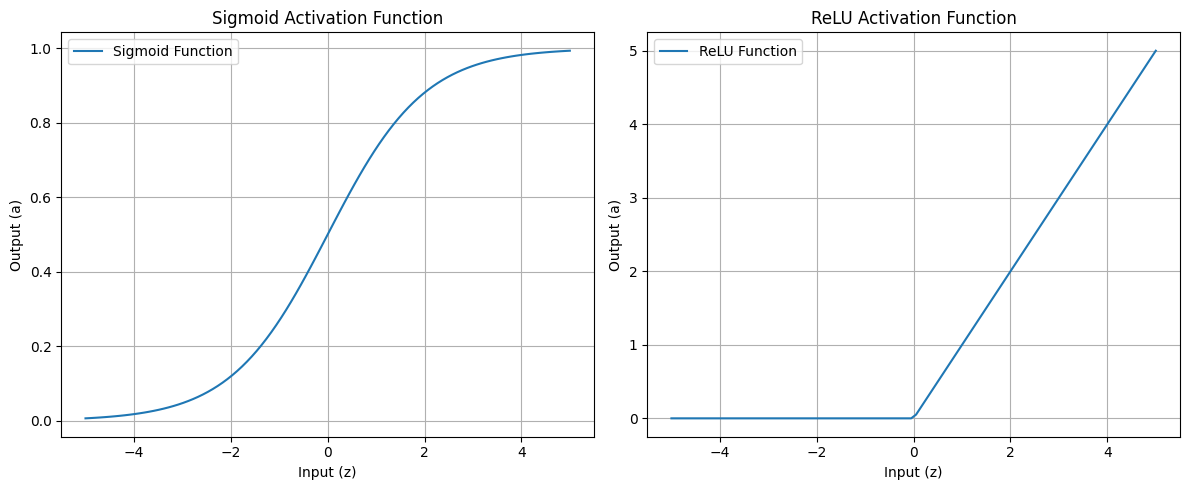


--- Softmax Demonstration ---
Raw scores (logits) for classes [Cat, Dog, Bird]: [3.2 1.3 0.2]
Softmax Probabilities: [0.83378101 0.12470747 0.04151151]
Sum of probabilities: 1.0000 (This should always be approximately 1)

Raw scores (logits 2) for classes [Cat, Dog, Bird]: [10.   1.   0.1]
Softmax Probabilities 2: [9.99826446e-01 1.23388386e-04 5.01659740e-05]


In [10]:
import numpy as np
import matplotlib.pyplot as plt

print("\n--- 4.1.2 Activation Functions ---")

# Define activation functions in Python
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def softmax(z):
    # We subtract np.max(z) from z to make computations more numerically stable for very large z values.
    # This is a common trick to prevent "overflow" errors.
    exp_z = np.exp(z - np.max(z))
    return exp_z / np.sum(exp_z)

# Generate a range of input values (z) to plot the functions
z_values = np.linspace(-5, 5, 100) # 100 points between -5 and 5

# --- Plotting Sigmoid and ReLU ---
plt.figure(figsize=(12, 5))

# Plot Sigmoid
plt.subplot(1, 2, 1) # This means 1 row, 2 columns, 1st plot
plt.plot(z_values, sigmoid(z_values), label='Sigmoid Function')
plt.title('Sigmoid Activation Function')
plt.xlabel('Input (z)')
plt.ylabel('Output (a)')
plt.grid(True)
plt.legend()

# Plot ReLU
plt.subplot(1, 2, 2) # This means 1 row, 2 columns, 2nd plot
plt.plot(z_values, relu(z_values), label='ReLU Function')
plt.title('ReLU Activation Function')
plt.xlabel('Input (z)')
plt.ylabel('Output (a)')
plt.grid(True)
plt.legend()
plt.tight_layout() # Adjusts plot parameters for a tight layout
plt.show()

# --- Demonstrating Softmax ---
print("\n--- Softmax Demonstration ---")
# Example raw scores (often called "logits") from the previous layer for 3 hypothetical classes
scores = np.array([3.2, 1.3, 0.2]) # Let's say these are scores for Cat, Dog, Bird

probabilities = softmax(scores)

print(f"Raw scores (logits) for classes [Cat, Dog, Bird]: {scores}")
print(f"Softmax Probabilities: {probabilities}")
print(f"Sum of probabilities: {probabilities.sum():.4f} (This should always be approximately 1)")

# Another example for Softmax with more distinct scores
scores_2 = np.array([10.0, 1.0, 0.1])
probabilities_2 = softmax(scores_2)
print(f"\nRaw scores (logits 2) for classes [Cat, Dog, Bird]: {scores_2}")
print(f"Softmax Probabilities 2: {probabilities_2}")

* **Exercise:**

    1.  **Why Non-Linearity?** Imagine you have a classification problem where data points for two classes are arranged in a circle, with one class inside the circle and the other outside. Can a straight line (linear model) separate them? How do activation functions help neural networks solve such problems?
    2.  **Choosing the Right Output Activation:** If you're building a neural network to:
          * a) Predict whether an email is spam (yes/no)
          * b) Predict the exact price of a house
          * c) Predict if an animal in a picture is a cat, dog, or bird
            For each scenario, what type of activation function would you most likely use in the **output layer**? Explain your choice briefly.

-----

### **4.1.3 Network Architecture: Layers and Connections**

  * **Concept: Building Blocks of a Network**
    A neural network isn't just one neuron; it's many neurons organized into **layers**. These layers are interconnected, allowing information to flow and be transformed progressively.

      * **Input Layer:**

          * This is the very first layer. It's where your raw data enters the network.
          * The number of neurons in the input layer is equal to the number of features (or attributes) in your dataset. For example, if you're predicting house prices and have features like 'area', 'number of bedrooms', 'location score', your input layer would have 3 neurons.
          * Input layer neurons don't perform any calculations; they just pass the input values forward.

      * **Hidden Layers:**

          * These are the "brain" of the network, located between the input and output layers.
          * Each hidden layer consists of a set of neurons, and each neuron in a hidden layer performs the weighted sum + bias + activation function calculation we discussed earlier.
          * They learn increasingly complex patterns and representations of the input data.
          * A network with **more than one hidden layer** is called a **"Deep Neural Network"** – hence the term "Deep Learning." The more hidden layers, the "deeper" the network.

      * **Output Layer:**

          * This is the final layer that produces the network's prediction.
          * The number of neurons and the choice of activation function in the output layer depend entirely on the type of problem you're trying to solve:
              * **Binary Classification (e.g., spam/not spam):** Typically 1 neuron with a **Sigmoid** activation function (outputting a probability between 0 and 1).
              * **Multi-class Classification (e.g., cat/dog/bird):** N neurons with a **Softmax** activation function, where N is the number of classes (outputting probabilities for each class that sum to 1).
              * **Regression (e.g., house price):** Usually 1 neuron with a **linear activation function** (or no explicit activation, meaning the output is just the weighted sum + bias), as you want a direct numerical value.

      * **Connections (Weights and Biases):**

          * The neurons between layers are usually "fully connected" or "dense" – meaning every neuron in one layer is connected to every neuron in the next layer.
          * Each of these connections has a unique **weight**, and each neuron (except in the input layer) has a **bias**.
          * These weights and biases are the **parameters** that the neural network "learns" during its training process. They are adjusted repeatedly to minimize prediction errors.

      * **Feedforward Network:**

          * In the simplest type of neural network, called a **feedforward network**, information flows strictly in one direction: from the input layer, through any hidden layers, and finally to the output layer. There are no loops or backward connections.

      * **Depth vs. Width:**

          * **Depth:** Refers to the number of hidden layers. "Deep" learning implies using networks with many hidden layers.
          * **Width:** Refers to the number of neurons within each layer.

  * **Example (Conceptual Diagram and Simple Manual Forward Pass):**
    Let's trace how data flows through a small, conceptual neural network. This process, where data moves from input to output to generate a prediction, is called **forward propagation**.

In [11]:
import numpy as np

print("\n--- 4.1.3 Network Architecture: Layers and Connections ---")

# Conceptual description of our small network:
print("Let's imagine a small neural network with the following structure:")
print("- **Input Layer:** 2 neurons (representing 2 features of our data)")
print("- **Hidden Layer:** 3 neurons, using ReLU activation")
print("- **Output Layer:** 1 neuron, using Sigmoid activation (for a binary classification prediction, like 0 or 1)")

# Define our previously defined activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

# --- Define the 'learned' Weights and Biases for our conceptual network ---
# In a real network, these values are learned during training. Here, we're just setting them for demonstration.

# Weights connecting Input Layer (2 neurons) to Hidden Layer (3 neurons)
# Shape: (number of inputs, number of hidden neurons) = (2, 3)
W_hidden_layer = np.array([
    [0.2, 0.8, -0.5],  # Weights from Input Feature 1 to Hidden Neurons 1, 2, 3
    [0.5, -0.1, 0.3]   # Weights from Input Feature 2 to Hidden Neurons 1, 2, 3
])
# Biases for the 3 neurons in the Hidden Layer
b_hidden_layer = np.array([-0.2, 0.1, 0.5])

# Weights connecting Hidden Layer (3 neurons) to Output Layer (1 neuron)
# Shape: (number of hidden neurons, number of output neurons) = (3, 1)
W_output_layer = np.array([0.7, -0.4, 0.6]).reshape(3, 1) # .reshape(3,1) makes it a column vector
# Bias for the single neuron in the Output Layer
b_output_layer = np.array([0.1])

# --- Example Input Data ---
# Let's feed some data into our network. This represents a single data point with 2 features.
X_input_data = np.array([0.5, 0.7])

print(f"\nIncoming Input Data: {X_input_data}")

# --- Step 1: Forward Pass through the Hidden Layer ---
print("\n-- Calculating for Hidden Layer --")
# First, calculate the weighted sum + bias for each hidden neuron: W_h * X_input + b_h
# np.dot performs matrix multiplication: (1x2) * (2x3) -> (1x3)
z_hidden_layer = np.dot(X_input_data, W_hidden_layer) + b_hidden_layer
print(f"  Weighted sums for hidden layer neurons (before activation): {z_hidden_layer}")

# Apply the ReLU activation function to the results
a_hidden_layer = relu(z_hidden_layer)
print(f"  Activations (outputs) of hidden layer neurons: {a_hidden_layer}")

# --- Step 2: Forward Pass through the Output Layer ---
print("\n-- Calculating for Output Layer --")
# Now, the outputs from the hidden layer (a_h) become the inputs for the output layer.
# Calculate the weighted sum + bias for the output neuron: W_o * a_h + b_o
# np.dot performs matrix multiplication: (1x3) * (3x1) -> (1x1)
z_output_layer = np.dot(a_hidden_layer, W_output_layer) + b_output_layer
print(f"  Weighted sum for output layer neuron (before activation): {z_output_layer.flatten()}") # .flatten() to remove extra brackets

# Apply the Sigmoid activation function to get the final probability
predicted_probability = sigmoid(z_output_layer)
print(f"  Predicted probability (output of network): {predicted_probability.flatten()}")

# For binary classification, we typically convert this probability to a class (0 or 1)
predicted_class = 1 if predicted_probability > 0.5 else 0
print(f"  Final Predicted Class: {predicted_class}")


--- 4.1.3 Network Architecture: Layers and Connections ---
Let's imagine a small neural network with the following structure:
- **Input Layer:** 2 neurons (representing 2 features of our data)
- **Hidden Layer:** 3 neurons, using ReLU activation
- **Output Layer:** 1 neuron, using Sigmoid activation (for a binary classification prediction, like 0 or 1)

Incoming Input Data: [0.5 0.7]

-- Calculating for Hidden Layer --
  Weighted sums for hidden layer neurons (before activation): [0.25 0.43 0.46]
  Activations (outputs) of hidden layer neurons: [0.25 0.43 0.46]

-- Calculating for Output Layer --
  Weighted sum for output layer neuron (before activation): [0.379]
  Predicted probability (output of network): [0.59363189]
  Final Predicted Class: 1


* **Exercise:**

    1.  **Role of Bias:** In the `W_output_layer` and `b_output_layer`, if `b_output_layer` was set to a very large positive number (e.g., 100), what would you expect the `predicted_probability` to be, regardless of the inputs? Explain why.
    2.  **Output Layer Design:** If you were designing a neural network to identify handwritten digits from 0 to 9 (10 different categories), how many neurons would you need in your **output layer**, and which activation function would you use? Why?


## 4.2: Building ANN Models with TensorFlow & Keras**

### **4.2.1 Setting Up Your Environment (Google Colab)**
 TensorFlow and Keras are pre-installed in Colab, making it an ideal platform for learning and experimentation.
 * **Steps in Colab:**

    1.  **Open Colab:** Go to [colab.research.google.com](https://colab.research.google.com/) and sign in with your Google account.
    2.  **Create New Notebook:** Click "File" \> "New notebook".
    3.  **Change Runtime Type (Optional but Recommended for Speed):**
          * Click "Runtime" \> "Change runtime type".
          * Under "Hardware accelerator," select "GPU" or "TPU" (GPU is usually sufficient for most beginner tasks).
          * Click "Save".
    4.  **Import Libraries:** The first step in any TensorFlow/Keras project is to import the necessary libraries.

  * **Colab Example:**

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder # For data preprocessing

print("--- 4.2.1 Setting Up Your Environment (Google Colab) ---")
print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")

# Check if GPU is available (optional, but good practice)
if tf.config.list_physical_devices('GPU'):
    print("\nGPU is available and will be used.")
else:
    print("\nNo GPU available, using CPU. Training might be slower.")

# A simple example to show TensorFlow is working
hello_tf = tf.constant("Hello, TensorFlow!")
print(f"\nTensorFlow says: {hello_tf.numpy().decode('utf-8')}")

--- 4.2.1 Setting Up Your Environment (Google Colab) ---
TensorFlow Version: 2.18.0
Keras Version: 3.8.0

No GPU available, using CPU. Training might be slower.

TensorFlow says: Hello, TensorFlow!


* **Exercise:**

    1.  Create a new Colab notebook and run the code above.
    2.  Verify the TensorFlow version and check if a GPU is detected. If not, try changing the runtime type as described.

-----

### **4.2.2 Preparing Data for Neural Networks**

  * **Concept:**
    Neural networks work best with numerical data that is properly scaled. Before feeding data into your model, it's crucial to perform some preprocessing steps:

    1.  **Numerical Representation:** Ensure all your features are in a numerical format. Categorical data (like "red", "green", "blue") needs to be converted (e.g., using One-Hot Encoding or Label Encoding).
    2.  **Scaling/Normalization:** Features with widely different ranges can cause problems during training (e.g., features with larger values might dominate the learning process). Scaling ensures all features contribute equally. Common methods include:
          * **Standardization (Z-score normalization):** Transforms data to have a mean of 0 and a standard deviation of 1. Useful when data follows a Gaussian (bell curve) distribution.
              * Formula: $x' = (x - \\mu) / \\sigma$
          * **Min-Max Scaling (Normalization):** Transforms data to a fixed range, usually between 0 and 1. Useful when you need values within a specific boundary.
              * Formula: \begin{align}$x' = (x - \\min(x)) / (\\max(x) - \\min(x))$\end{align}
    3.  **Splitting Data:** Always split your dataset into at least two parts:
          * **Training Data:** Used to train the model.
          * **Testing Data:** Used to evaluate the model's performance on unseen data. This helps estimate how well your model will generalize to new, real-world examples. A third split, **Validation Data**, is also common, used during training to tune hyperparameters and prevent overfitting.

  * **Colab Example (Data Preprocessing):**
    Let's create some dummy data and apply these preprocessing steps.

In [13]:
print("\n--- 4.2.2 Preparing Data for Neural Networks ---")

# 1. Create Dummy Data
np.random.seed(42) # for reproducibility
num_samples = 1000
# Features: Age (0-80), Income (20k-150k), Number of children (0-5)
X = pd.DataFrame({
    'Age': np.random.randint(0, 80, num_samples),
    'Income': np.random.randint(20000, 150000, num_samples),
    'Num_Children': np.random.randint(0, 6, num_samples),
    'City': np.random.choice(['NYC', 'LA', 'Chicago', 'Houston'], num_samples)
})
# Target: A simple binary classification based on features (e.g., buys product or not)
y = ((X['Age'] * 0.02 + X['Income'] * 0.00001 + X['Num_Children'] * 0.5 +
      (X['City'] == 'NYC').astype(int) * 2 + np.random.rand(num_samples)) > 5).astype(int)

print("Original Data Head (first 5 rows):")
print(X.head())
print("\nOriginal Target Head (first 5 values):")
print(y.head())

# 2. Handle Categorical Data (One-Hot Encoding for 'City')
X_processed = pd.get_dummies(X, columns=['City'], drop_first=True) # drop_first to avoid multicollinearity
print("\nData after One-Hot Encoding for 'City':")
print(X_processed.head())

# 3. Scaling Numerical Features (StandardScaler)
# Identify numerical columns for scaling (all except the one-hot encoded ones)
numerical_cols = ['Age', 'Income', 'Num_Children']
scaler = StandardScaler()
X_processed[numerical_cols] = scaler.fit_transform(X_processed[numerical_cols])

print("\nData after Scaling Numerical Features:")
print(X_processed.head())

# 4. Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y # stratify helps maintain class balance
)

print(f"\nShape of training features (X_train): {X_train.shape}")
print(f"Shape of testing features (X_test): {X_test.shape}")
print(f"Shape of training target (y_train): {y_train.shape}")
print(f"Shape of testing target (y_test): {y_test.shape}")

# Convert to NumPy arrays, which Keras often prefers
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

print("\nData ready for model building!")


--- 4.2.2 Preparing Data for Neural Networks ---
Original Data Head (first 5 rows):
   Age  Income  Num_Children City
0   51   96589             3   LA
1   14   42116             5   LA
2   71   56244             1   LA
3   60  121721             5  NYC
4   20   21645             1   LA

Original Target Head (first 5 values):
0    0
1    0
2    0
3    1
4    0
dtype: int64

Data after One-Hot Encoding for 'City':
   Age  Income  Num_Children  City_Houston  City_LA  City_NYC
0   51   96589             3         False     True     False
1   14   42116             5         False     True     False
2   71   56244             1         False     True     False
3   60  121721             5         False    False      True
4   20   21645             1         False     True     False

Data after Scaling Numerical Features:
        Age    Income  Num_Children  City_Houston  City_LA  City_NYC
0  0.558134  0.305632      0.261993         False     True     False
1 -1.044828 -1.142263      1.439

* **Exercise:**

    1.  Explain why `StandardScaler` is generally preferred over `MinMaxScaler` when dealing with features that might have outliers.
    2.  If your `y` (target variable) was `[0, 1, 2, 0, 1]` representing different categories, and you wanted to use `categorical_crossentropy` as a loss function, what transformation would you apply to `y`? (Hint: Think about converting categories into binary vectors).

-----

### **4.2.3 Building Your First ANN Model (Keras Sequential API)**

  * **Concept:**
    Keras offers a straightforward way to build neural networks, especially for models where layers are stacked one after another, creating a single input-to-output flow. This is done using the `Sequential` API.

      * **`keras.Sequential()`:** This creates an empty "stack" where you can add layers.
      * **`model.add()`:** Used to add layers to your sequential model.
      * **`layers.Dense()`:** This is the most common type of layer for simple ANNs. It represents a "fully connected" layer, meaning every neuron in this layer receives input from *all* neurons in the previous layer.
          * `units`: The number of neurons (or "units") in that layer.
          * `activation`: The activation function to apply (e.g., `'relu'`, `'sigmoid'`, `'softmax'`).
          * `input_shape`: **Crucial for the first layer\!** This parameter tells the model the shape of your input data (e.g., `(number_of_features,)`). You only need to specify this for the very first hidden layer. Keras automatically infers the shape for subsequent layers.

  * **Colab Example:**

In [14]:
print("\n--- 4.2.3 Building Your First ANN Model (Keras Sequential API) ---")

# Determine the number of features (inputs) from our preprocessed training data
input_features = X_train_np.shape[1]
print(f"Number of input features for the model: {input_features}")

# 1. Initialize the Sequential model
model = keras.Sequential()

# 2. Add layers to the model

# Input Layer (implicitly defined by the input_shape of the first Dense layer)
# Hidden Layer 1: 32 neurons, ReLU activation
# input_shape must match the number of features in X_train_np
model.add(layers.Dense(units=32, activation='relu', input_shape=(input_features,)))

# Hidden Layer 2: 16 neurons, ReLU activation
model.add(layers.Dense(units=16, activation='relu'))

# Output Layer: 1 neuron for binary classification, Sigmoid activation
# Sigmoid outputs a probability between 0 and 1
model.add(layers.Dense(units=1, activation='sigmoid'))

# 3. Display the model summary
# This shows the layers, number of neurons, and number of trainable parameters (weights + biases)
print("\nModel Summary:")
model.summary()

# Understanding the parameters in model.summary():
# 'Param #' refers to the number of weights and biases in that layer.
# For a Dense layer with `N` input connections and `M` neurons:
# Parameters = (N * M) + M (M for biases)
# Example for first hidden layer (Input_features=5, Hidden_neurons=32):
# (5 * 32) + 32 = 160 + 32 = 192 parameters.
# The 'None' in the output shape means the batch size can be anything.


--- 4.2.3 Building Your First ANN Model (Keras Sequential API) ---
Number of input features for the model: 6

Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

* **Exercise:**

    1.  Modify the example above to add a third hidden layer with 8 neurons and `relu` activation. Then, run `model.summary()` again and verify how the number of parameters changes.
    2.  If you were building a model for multi-class classification with 5 classes, how would you change the `units` and `activation` for the **output layer**?

-----

### **4.2.4 Compiling the Model**

  * **Concept:**
    Before a model can be trained, you need to `compile` it. This step configures the learning process by specifying:

      * **Optimizer:** This is the "engine" that drives the learning process. It's an algorithm that adjusts the model's weights and biases during training to minimize the `loss`. Popular optimizers include:
          * `'adam'` (Adaptive Moment Estimation): Generally a good default choice, often works well in practice.
          * `'sgd'` (Stochastic Gradient Descent): A foundational optimizer.
          * `'rmsprop'`
      * **Loss Function:** This measures how well (or poorly) your model is performing during training. It quantifies the difference between the model's predictions and the true target values. The goal of the optimizer is to minimize this loss.
          * **`'binary_crossentropy'`:** Used for binary classification problems (like our current example, where the output is 0 or 1, often a probability from a Sigmoid).
          * **`'categorical_crossentropy'`:** Used for multi-class classification where your target labels are one-hot encoded (e.g., `[0,0,1]` for class 2).
          * **`'sparse_categorical_crossentropy'`:** Used for multi-class classification where your target labels are integers (e.g., `2` for class 2).
          * **`'mean_squared_error'` (or `'mse'`):** Used for regression problems (predicting continuous numerical values).
      * **Metrics:** These are used to monitor the training and testing steps. Unlike loss, which the optimizer tries to minimize, metrics are simply reported to give you a human-interpretable understanding of the model's performance.
          * `'accuracy'` (or `'acc'`): Common for classification problems.
          * `'mse'` (Mean Squared Error): Common for regression problems.

  * **Colab Example:**

In [15]:
print("\n--- 4.2.4 Compiling the Model ---")

# 1. Compile the model
# For our binary classification problem:
#   - Optimizer: 'adam' (a good general-purpose optimizer)
#   - Loss: 'binary_crossentropy' (suitable for binary classification with sigmoid output)
#   - Metrics: 'accuracy' (to see how many predictions are correct)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully!")


--- 4.2.4 Compiling the Model ---
Model compiled successfully!


* **Exercise:**

    1.  If you were building a neural network to predict house prices (a regression task), how would you change the `loss` and `metrics` parameters in the `model.compile()` step?
    2.  Research another common optimizer (e.g., SGD, RMSprop) and briefly describe one key difference between it and Adam.

-----

### **4.2.5 Training the Model (Fitting the Data)**

  * **Concept:**
    Once the model is built and compiled, the next crucial step is to train it using your prepared training data. This process is called "fitting" the model to the data.

      * **`model.fit()`:** This function starts the training process.
          * `x`: Your training input data (features, `X_train_np` in our case).
          * `y`: Your training target data (labels, `y_train_np` in our case).
          * `epochs`: The number of times the entire training dataset will be passed forward and backward through the neural network. More epochs can lead to better learning but also increase the risk of overfitting.
          * `batch_size`: The number of samples processed before the model's internal parameters (weights and biases) are updated.
              * **Small batch size:** More frequent updates, noisier gradients, might escape local minima better. Can be slower per epoch.
              * **Large batch size:** Less frequent updates, more stable gradients, faster per epoch. Can get stuck in local minima.
              * Common batch sizes are powers of 2 (e.g., 32, 64, 128, 256).
          * `validation_split`: A fraction of the training data (e.g., 0.1 for 10%) that will be set aside and *not* used for training, but rather for evaluating the model at the end of each epoch. This gives you an idea of how well your model is generalizing on unseen data *during* training, helping to detect overfitting early.
          * `verbose`: Controls how much information is displayed during training (0=silent, 1=progress bar, 2=one line per epoch).

  * **Colab Example:**


--- 4.2.5 Training the Model (Fitting the Data) ---
X dtype: float32, X shape: (800, 6)
y mode: binary, n_classes: 2, y shape: (800,)
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7722 - loss: 0.6253 - val_accuracy: 0.7875 - val_loss: 0.5627
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8131 - loss: 0.5275 - val_accuracy: 0.8000 - val_loss: 0.4814
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8504 - loss: 0.4296 - val_accuracy: 0.8375 - val_loss: 0.4037
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8736 - loss: 0.3679 - val_accuracy: 0.8750 - val_loss: 0.3342
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9038 - loss: 0.3027 - val_accuracy: 0.9125 - val_loss: 0.2815
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9043 - loss: 0.2636 - val_accuracy: 0.9125 - val_loss: 0.2427
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9085 - loss: 0.2252 - val_accuracy: 0.9250 -

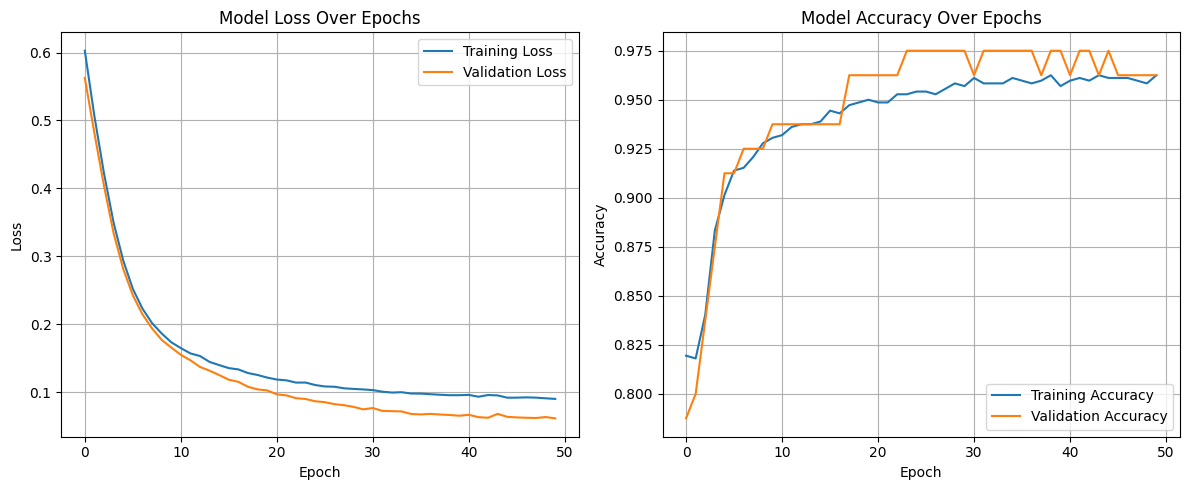

In [17]:
print("\n--- 4.2.5 Training the Model (Fitting the Data) ---")

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt

# ---------- Helpers ----------
def coerce_features_to_numeric(X):
    """Return float32 numpy array from DataFrame/array, coercing to numeric and imputing NaNs."""
    if isinstance(X, pd.DataFrame):
        X_num = X.apply(pd.to_numeric, errors="coerce")
        # Simple impute; replace with your pipeline if needed
        X_num = X_num.fillna(X_num.median(numeric_only=True))
        return X_num.to_numpy(dtype=np.float32)
    # Anything else -> ndarray
    X_arr = np.asarray(X, dtype=object)  # keep object to detect issues
    if X_arr.dtype == object:
        # Convert elementwise to numeric via DataFrame path (robust to mixed types)
        X_arr = pd.DataFrame(X_arr).apply(pd.to_numeric, errors="coerce")
        X_arr = X_arr.fillna(X_arr.median(numeric_only=True))
        X_arr = X_arr.to_numpy()
    return X_arr.astype(np.float32)

def prepare_labels(y):
    """
    Returns:
      y_fixed: numpy labels (int or float)
      label_mode: 'binary' | 'multiclass_int' | 'multiclass_onehot'
      n_classes: int or None
      encoder: LabelEncoder or None
    """
    # Flatten common wrappers
    if isinstance(y, (pd.Series, pd.DataFrame)):
        y_arr = y.to_numpy()
    else:
        y_arr = np.asarray(y, dtype=object)

    # Squeeze 2D (n,1) to 1D
    if y_arr.ndim == 2 and y_arr.shape[1] == 1:
        y_arr = y_arr.ravel()

    # One-hot case: 2D with >1 columns and entries are numeric-like
    if y_arr.ndim == 2 and y_arr.shape[1] > 1:
        # Ensure numeric
        y_oh = pd.DataFrame(y_arr).apply(pd.to_numeric, errors="coerce").fillna(0).to_numpy()
        y_oh = y_oh.astype(np.float32)
        n_classes = y_oh.shape[1]
        return y_oh, "multiclass_onehot", n_classes, None

    # Now 1D labels; convert strings/objects to integers if needed
    if y_arr.dtype == object:
        y_arr = np.array([None if v is None else str(v) for v in y_arr], dtype=object)
        # Label encode strings
        le = LabelEncoder()
        y_int = le.fit_transform(y_arr.astype(str))
        classes = np.unique(y_int)
        if len(classes) == 2:
            # Binary (0/1)
            y_num = y_int.astype(np.float32)
            return y_num, "binary", 2, le
        else:
            return y_int.astype(np.int64), "multiclass_int", len(classes), le

    # Already numeric; decide binary vs multiclass by unique count
    y_num = y_arr.astype(np.float32)
    uniq = np.unique(y_num[~np.isnan(y_num)])
    if uniq.size == 2 and set(uniq.tolist()) <= {0.0, 1.0}:
        return y_num, "binary", 2, None
    # Treat as integer class ids if all are close to ints and non-negative
    if np.all(np.isclose(y_num, np.round(y_num))) and np.min(y_num) >= 0:
        y_int = y_num.astype(np.int64)
        return y_int, "multiclass_int", int(np.max(y_int) + 1), None

    # Fallback to binary regression-like (rare); you can adjust if needed
    return y_num, "binary", 2, None

def ensure_compiled(model, label_mode, n_classes):
    """Compile model with an appropriate loss/metrics."""
    # Choose loss/metrics
    if label_mode == "binary":
        loss = "binary_crossentropy"
        metrics = ["accuracy"]
    elif label_mode == "multiclass_int":
        loss = "sparse_categorical_crossentropy"
        metrics = ["accuracy"]
    else:  # 'multiclass_onehot'
        loss = "categorical_crossentropy"
        metrics = ["accuracy"]

    # (Re)compile – safe even if already compiled
    model.compile(optimizer="adam", loss=loss, metrics=metrics)

    # Basic shape sanity checks
    try:
        out = model.output_shape
        out_units = out[-1] if isinstance(out[-1], int) else (out[-1][-1] if isinstance(out[-1], (list, tuple)) else None)
        if label_mode == "binary":
            if out_units not in (1, None):
                print(f"⚠️  Model outputs {out_units} units but binary labels expected. "
                      f"Consider Dense(1, activation='sigmoid').")
        else:
            if out_units not in (n_classes, None):
                print(f"⚠️  Model outputs {out_units} units but {n_classes}-class labels expected. "
                      f"Consider Dense({n_classes}, activation='softmax').")
    except Exception:
        pass

# ---------- Coerce X and y ----------
X_train_np = coerce_features_to_numeric(X_train_np)
y_train_np, label_mode, n_classes, label_encoder = prepare_labels(y_train_np)

print(f"X dtype: {X_train_np.dtype}, X shape: {X_train_np.shape}")
print(f"y mode: {label_mode}, n_classes: {n_classes}, y shape: {np.shape(y_train_np)}")

# ---------- Compile appropriately ----------
ensure_compiled(model, label_mode, n_classes)

# ---------- Train ----------
history = model.fit(
    X_train_np, y_train_np,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

print("\nModel training complete!")

# ---------- Plot training history ----------
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history.get('loss', []), label='Training Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy (only if available)
plt.subplot(1, 2, 2)
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


* **Exercise:**

    1.  Observe the plots of training and validation loss/accuracy. If the training loss continues to decrease but the validation loss starts to increase, what does this typically indicate? (Hint: Think about "overfitting").
    2.  Experiment with different `epochs` (e.g., 10, 100) and `batch_size` (e.g., 64, 128) values. How do these changes affect the training speed and the final loss/accuracy values?

-----

### **4.2.6 Evaluating the Model**

  * **Concept:**
    After training, it's crucial to evaluate your model's performance on completely unseen data – the `X_test` and `y_test` sets that were separated before training. This gives you a realistic estimate of how well your model will perform on new, real-world data.

      * **`model.evaluate()`:** This method calculates the loss and metrics (that you specified in `model.compile()`) on the provided test dataset.
          * `x`: Test input data (`X_test_np`).
          * `y`: Test target data (`y_test_np`).
          * `verbose`: Same as in `fit()`.

  * **Colab Example:**

In [19]:
print("\n--- 4.2.6 Evaluating the Model ---")

import numpy as np
import pandas as pd
import tensorflow as tf

def transform_test_labels(y_test, label_mode, label_encoder=None, n_classes=None):
    """Transform test labels to match how training labels were prepared."""
    # Normalize container & shape
    if isinstance(y_test, (pd.Series, pd.DataFrame)):
        y = y_test.to_numpy()
    else:
        y = np.asarray(y_test, dtype=object)

    if y.ndim == 2 and y.shape[1] == 1:
        y = y.ravel()

    if label_mode == "multiclass_onehot":
        # Ensure numeric 2D one-hot; if given as class ids, convert to one-hot
        y_arr = pd.DataFrame(y).apply(pd.to_numeric, errors="coerce").fillna(0).to_numpy()
        if y_arr.ndim == 1:
            if n_classes is None:
                n_classes = int(np.nanmax(y_arr)) + 1
            y_arr = tf.keras.utils.to_categorical(y_arr.astype(int), num_classes=n_classes)
        return y_arr.astype(np.float32)

    if label_mode == "multiclass_int":
        # Strings -> use the same encoder as training
        if y.dtype == object:
            if label_encoder is None:
                raise ValueError("Test labels are strings but label_encoder is None; "
                                 "use the encoder from training.")
            y_int = label_encoder.transform(y.astype(str))
        else:
            # Numeric but possibly stringy; coerce robustly
            y_int = pd.Series(y).apply(pd.to_numeric, errors="coerce").fillna(0).astype(int).to_numpy()
        return y_int

    # Binary
    if y.dtype == object:
        if label_encoder is not None:
            y_num = label_encoder.transform(y.astype(str)).astype(np.float32)
        else:
            y_num = pd.Series(y).apply(pd.to_numeric, errors="coerce").fillna(0).astype(float).to_numpy()
    else:
        y_num = np.asarray(y, dtype=np.float32)

    if y_num.ndim == 2 and y_num.shape[1] == 1:
        y_num = y_num.ravel()
    return y_num

# --- Ensure numeric features and matching labels on TEST data ---
X_test_np = coerce_features_to_numeric(X_test_np)
y_test_np = transform_test_labels(y_test_np, label_mode, label_encoder, n_classes)

# --- Evaluate ---
results = model.evaluate(X_test_np, y_test_np, verbose=0)

# Keras can return [loss, acc, ...] or just loss
if isinstance(results, (list, tuple)):
    loss = results[0]
    accuracy = results[1] if len(results) > 1 else float("nan")
else:
    loss = float(results)
    accuracy = float("nan")

print(f"\nTest Loss: {loss:.4f}")
if not np.isnan(accuracy):
    print(f"Test Accuracy: {accuracy:.4f}")

# Tip: large train/val vs test gap => possible overfitting



--- 4.2.6 Evaluating the Model ---

Test Loss: 0.1188
Test Accuracy: 0.9400


* **Exercise:**

    1.  Compare the "Test Accuracy" with the "Validation Accuracy" from the end of your training (visible in the plot or the last epoch's output). What does a large difference imply?
    2.  If your test accuracy is very low, what are some initial steps you might consider to improve your model (e.g., related to data, model architecture, or training parameters)?

-----

### **4.2.7 Making Predictions with the Trained Model**

  * **Concept:**
    The ultimate goal of building and training a model is to use it to make predictions on new, unseen data.

      * **`model.predict()`:** This method generates predictions (outputs) for the given input data. The output format will depend on your model's output layer and activation function.
          * For a binary classification model with a Sigmoid output, it will usually return probabilities (values between 0 and 1). You'll then apply a threshold (e.g., 0.5) to convert these probabilities into binary class labels (0 or 1).
          * For a multi-class classification model with a Softmax output, it will return probabilities for each class. You'll typically take the class with the highest probability as the predicted class.
          * For a regression model, it will return the predicted continuous values directly.

  * **Colab Example:**

In [21]:
print("\n--- 4.2.7 Making Predictions with the Trained Model ---")

# Take a few samples from the test set to predict on
num_predictions = 5
sample_X_for_prediction = X_test_np[:num_predictions]
actual_y_for_prediction = y_test_np[:num_predictions]

print(f"Input features for prediction (first {num_predictions} test samples):")
print(sample_X_for_prediction)
print(f"\nActual labels for these samples: {actual_y_for_prediction}")

# Make predictions
predictions_probabilities = model.predict(sample_X_for_prediction)
print(f"\nRaw predicted probabilities (from Sigmoid): {predictions_probabilities.flatten()}")

# Convert probabilities to binary class predictions (0 or 1) using a threshold of 0.5
predicted_classes = (predictions_probabilities > 0.5).astype(int)
print(f"Predicted classes (threshold 0.5): {predicted_classes.flatten()}")

print("\nComparison:")
for i in range(num_predictions):
    print(f"  Sample {i+1}: Actual = {actual_y_for_prediction[i]}, Predicted Probability = {predictions_probabilities[i][0]:.4f}, Predicted Class = {predicted_classes[i][0]}")


--- 4.2.7 Making Predictions with the Trained Model ---
Input features for prediction (first 5 test samples):
[[ 1.6412162  -0.7158657  -0.91550213  1.          0.          0.        ]
 [ 1.2513067   0.25443843 -0.91550213  0.          1.          0.        ]
 [-1.1314744  -1.4985679  -0.32675478  0.          0.          0.        ]
 [ 0.7747504  -1.1605762   0.26199257  0.          1.          0.        ]
 [-1.0881511   0.5285583  -0.91550213  0.          0.          1.        ]]

Actual labels for these samples: [0. 0. 0. 0. 0.]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step

Raw predicted probabilities (from Sigmoid): [1.6178351e-04 1.1816098e-04 1.4453275e-05 4.3604229e-04 7.4130874e-03]
Predicted classes (threshold 0.5): [0 0 0 0 0]

Comparison:
  Sample 1: Actual = 0.0, Predicted Probability = 0.0002, Predicted Class = 0
  Sample 2: Actual = 0.0, Predicted Probability = 0.0001, Predicted Class = 0
  Sample 3: Actual = 0.0, Predicted Probability = 0.0000, Predicted Class = 0
  Sample 4: 

* **Exercise:**

    1.  If your model was predicting 10 different types of images (multi-class classification) and the `model.predict()` output for one image was `[0.05, 0.02, 0.88, 0.01, ..., 0.00]`, how would you determine the predicted class?
    2.  What is the importance of using *unseen* data (`X_test_np` and not `X_train_np`) for final evaluation and making predictions to assess your model's real-world usefulness?


## **4.3: CNN for Image Classification**

### **4.3.1 Limitations of Traditional ANNs for Images**

  * **Concept:**
    Imagine a simple image (e.g., 28x28 pixels). If each pixel is an input feature, a single 28x28 grayscale image has 784 features. A color image (e.g., 28x28x3) has 2,352 features. Now consider a larger image, say 256x256x3 pixels, which is nearly 200,000 features\!

      * **Too Many Parameters (Weights):** For a traditional fully connected ANN, each neuron in the first hidden layer would need a weight connection to *every single pixel* in the input image. If the first hidden layer has, say, 1000 neurons, that's 200,000 \* 1000 = 200 million weights just for the first layer\! This leads to:
          * **High Computational Cost:** Training with so many parameters is extremely slow and resource-intensive.
          * **Risk of Overfitting:** With a huge number of parameters relative to the dataset size, the model can easily memorize the training data instead of learning generalizable patterns.
      * **Losing Spatial Information:** Traditional ANNs treat images as flat vectors of pixels. They don't inherently understand that pixels next to each other are related, or that specific patterns (like edges or corners) might appear anywhere in the image. They lose the spatial hierarchy and local relationships critical for image understanding.
      * **Lack of Translation Invariance:** If a cat is in the top-left corner of an image and then appears in the bottom-right corner of another identical image, a traditional ANN might treat them as completely different inputs, requiring separate learning for each position.

  * **Colab Explanation (Conceptual):**

In [22]:
print("--- 4.3.1 Limitations of Traditional ANNs for Images ---")

# Let's consider a small grayscale image for illustration
image_height = 28
image_width = 28
image_channels = 1 # 1 for grayscale, 3 for RGB

# Total pixels/features if flattened for a traditional ANN
total_features = image_height * image_width * image_channels
print(f"For a {image_height}x{image_width} grayscale image:")
print(f"  Total input features (pixels): {total_features}")

# Assume a first hidden layer with 512 neurons
num_hidden_neurons = 512
num_parameters_first_layer = (total_features * num_hidden_neurons) + num_hidden_neurons
print(f"  Parameters (weights + biases) in the first hidden layer of a traditional ANN (with {num_hidden_neurons} neurons): {num_parameters_first_layer}")

# Scale up for a larger color image
large_image_height = 256
large_image_width = 256
large_image_channels = 3 # RGB

large_total_features = large_image_height * large_image_width * large_image_channels
large_num_hidden_neurons = 1024 # Even larger hidden layer
large_num_parameters_first_layer = (large_total_features * large_num_hidden_neurons) + large_num_hidden_neurons
print(f"\nFor a {large_image_height}x{large_image_width} color image:")
print(f"  Total input features (pixels): {large_total_features}")
print(f"  Parameters in the first hidden layer: {large_num_parameters_first_layer:,} (over {large_num_parameters_first_layer / 1_000_000:.1f} Million!)")

print("\nThese massive numbers demonstrate why traditional ANNs become impractical for images.")
print("They also treat pixels as independent features, losing crucial spatial information.")

--- 4.3.1 Limitations of Traditional ANNs for Images ---
For a 28x28 grayscale image:
  Total input features (pixels): 784
  Parameters (weights + biases) in the first hidden layer of a traditional ANN (with 512 neurons): 401920

For a 256x256 color image:
  Total input features (pixels): 196608
  Parameters in the first hidden layer: 201,327,616 (over 201.3 Million!)

These massive numbers demonstrate why traditional ANNs become impractical for images.
They also treat pixels as independent features, losing crucial spatial information.


* **Exercise:**

    1.  If a small 10x10 grayscale image is input into a traditional ANN where the first hidden layer has 20 neurons, calculate the number of parameters (weights and biases) for that first hidden layer.
    2.  In simple terms, why is it problematic that a traditional ANN "loses spatial information" when processing an image?

-----

### **4.3.2 Convolutional Layer: Feature Extraction**

  * **Concept:**
    The **Convolutional Layer** is the core building block of a CNN. Instead of connecting every input pixel to every neuron, it uses small, learnable "filters" (also called "kernels") that slide across the input image. This process is called **convolution**.

      * **Filters/Kernels:** These are small matrices (e.g., 3x3, 5x5) that contain numerical values. Each filter is designed to detect a specific low-level feature in the image, such as edges, lines, corners, or textures. The filter's values are learned during training.
      * **Convolution Operation:** The filter slides (or "convolves") over the input image (or previous layer's output). At each position, it performs a dot product (element-wise multiplication and summation) with the image pixels it's currently covering. This result is a single value in the "feature map."
      * **Feature Map (Activation Map):** The output of one filter convolving over the entire input is called a feature map. Each value in the feature map indicates where and how strongly the learned feature (that the filter detects) is present in the input.
      * **Multiple Filters:** A convolutional layer typically uses multiple different filters. Each filter produces its own feature map, and these feature maps are stacked together to form the output of the convolutional layer.
      * **Stride:** The number of pixels the filter moves at each step. A stride of 1 means it moves one pixel at a time. A larger stride (e.g., 2x2) causes the feature map to be smaller, effectively downsampling the image.
      * **Padding:** When a filter slides over the image, pixels near the edges are covered fewer times.
          * `'valid'` padding (no padding): The output feature map will be smaller than the input.
          * `'same'` padding: Adds a border of zeros around the input so the output feature map has the same spatial dimensions as the input.
      * **Parameter Sharing:** A single filter (with its learned weights) is applied across the entire image. This significantly reduces the number of parameters compared to ANNs, and it allows the network to detect a feature *regardless of its position* in the image (translation invariance).

  * **Colab Example (Conceptual Convolution Operation):**


--- 4.3.2 Convolutional Layer: Feature Extraction ---
Input Image (5x5):
 [[0 0 0 0 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 0 0 0 0]]

Edge Filter (3x3):
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]

Output Feature Map (after convolution):
 [[ 2.  0. -2.]
 [ 3.  0. -3.]
 [ 2.  0. -2.]]


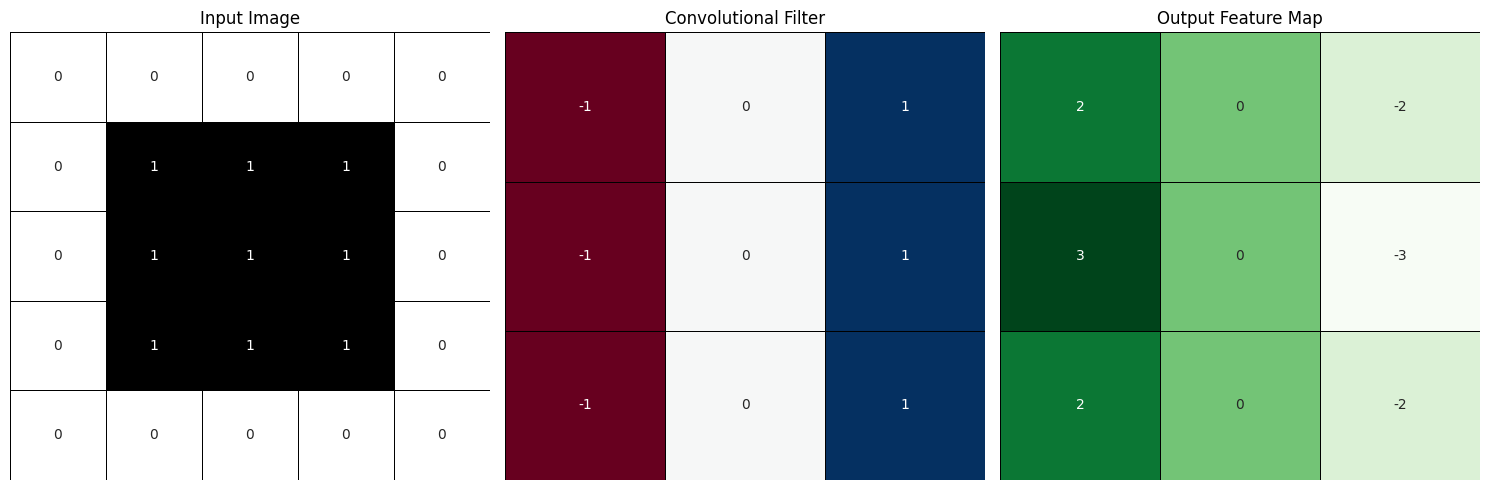


Notice how the filter highlights the vertical edges in the image.
Each value in the feature map corresponds to how strongly the filter's pattern was found at that location.


In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- 4.3.2 Convolutional Layer: Feature Extraction ---")

# Simple 2D Input Image (e.g., a 5x5 grayscale patch)
input_image = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
])

# Simple 3x3 Filter (e.g., an edge detector)
# This filter will light up (produce a high value) when it detects a vertical edge
edge_filter = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

print("Input Image (5x5):\n", input_image)
print("\nEdge Filter (3x3):\n", edge_filter)

# Manual Convolution Operation (Simplified, using 'valid' padding, stride=1)
# Output size = (Input_rows - Filter_rows + 1) x (Input_cols - Filter_cols + 1)
output_rows = input_image.shape[0] - edge_filter.shape[0] + 1
output_cols = input_image.shape[1] - edge_filter.shape[1] + 1
feature_map = np.zeros((output_rows, output_cols))

for r in range(output_rows):
    for c in range(output_cols):
        # Extract the current patch from the image
        patch = input_image[r:r + edge_filter.shape[0], c:c + edge_filter.shape[1]]
        # Perform element-wise multiplication and sum (dot product)
        feature_map[r, c] = np.sum(patch * edge_filter)

print("\nOutput Feature Map (after convolution):\n", feature_map)

# Visualization of Input, Filter, and Output
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(input_image, annot=True, cmap='binary', cbar=False, linewidths=.5, linecolor='black')
plt.title('Input Image')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
sns.heatmap(edge_filter, annot=True, cmap='RdBu', cbar=False, linewidths=.5, linecolor='black')
plt.title('Convolutional Filter')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
sns.heatmap(feature_map, annot=True, cmap='Greens', cbar=False, linewidths=.5, linecolor='black')
plt.title('Output Feature Map')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

print("\nNotice how the filter highlights the vertical edges in the image.")
print("Each value in the feature map corresponds to how strongly the filter's pattern was found at that location.")

* **Exercise:**

    1.  Design a simple 3x3 filter (similar to `edge_filter`) that you believe would detect a **horizontal edge**. Test it conceptually on a simple image.
    2.  What is the main benefit of "parameter sharing" in convolutional layers compared to fully connected layers for image processing?

-----

### **4.3.3 Pooling Layer: Downsampling**

  * **Concept:**
    After convolutional layers extract features, **Pooling Layers** are typically used to reduce the spatial dimensions (height and width) of the feature maps. This serves several purposes:

      * **Dimensionality Reduction:** Reduces the number of parameters and computational cost in subsequent layers, making the network faster and less prone to overfitting.

      * **Feature Robustness (Translation Invariance):** Makes the features detected by the network slightly more robust to small shifts or distortions in the input image. If a feature (like an edge) shifts a few pixels, max-pooling can still detect it.

      * **Summarization:** Each pooled region summarizes the presence of a feature in a larger area of the input.

      * **Types of Pooling:**

          * **Max Pooling:** The most common type. It takes the maximum value from a small window (e.g., 2x2) within the feature map. It keeps the most "active" feature detection from that region.
          * **Average Pooling:** Takes the average value from a window. Less common than max pooling as it tends to blur out sharp features.

      * **Pooling Parameters:**

          * `pool_size`: The size of the window (e.g., `(2,2)`).
          * `strides`: How far the window moves at each step. Often set equal to `pool_size` (e.g., `strides=(2,2)` means non-overlapping windows).

  * **Colab Example (Max Pooling Operation):**


--- 4.3.3 Pooling Layer: Downsampling ---
Original Feature Map (4x4):
 [[1 2 5 1]
 [3 4 6 2]
 [7 8 3 4]
 [9 0 1 5]]

Pooled Feature Map (2x2):
 [[4. 6.]
 [9. 5.]]


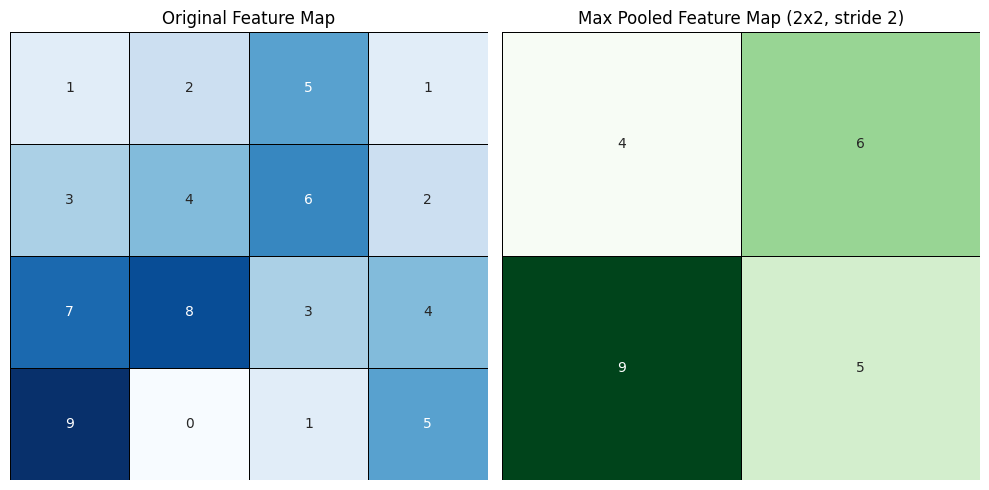


Max pooling effectively summarizes the most important feature detection in each region,
reducing the map size while retaining key information.


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- 4.3.3 Pooling Layer: Downsampling ---")

# Example Feature Map (output from a convolutional layer)
sample_feature_map = np.array([
    [1, 2, 5, 1],
    [3, 4, 6, 2],
    [7, 8, 3, 4],
    [9, 0, 1, 5]
])

print("Original Feature Map (4x4):\n", sample_feature_map)

# Perform Max Pooling (2x2 window, stride=2)
pool_size = (2, 2)
stride = (2, 2)

# Calculate output dimensions
output_rows = sample_feature_map.shape[0] // stride[0]
output_cols = sample_feature_map.shape[1] // stride[1]
pooled_feature_map = np.zeros((output_rows, output_cols))

for r in range(output_rows):
    for c in range(output_cols):
        # Define the pooling window
        r_start = r * stride[0]
        r_end = r_start + pool_size[0]
        c_start = c * stride[1]
        c_end = c_start + pool_size[1]

        window = sample_feature_map[r_start:r_end, c_start:c_end]
        pooled_feature_map[r, c] = np.max(window) # Max Pooling operation

print(f"\nPooled Feature Map ({pooled_feature_map.shape[0]}x{pooled_feature_map.shape[1]}):\n", pooled_feature_map)

# Visualization
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(sample_feature_map, annot=True, cmap='Blues', cbar=False, linewidths=.5, linecolor='black')
plt.title('Original Feature Map')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
sns.heatmap(pooled_feature_map, annot=True, cmap='Greens', cbar=False, linewidths=.5, linecolor='black')
plt.title('Max Pooled Feature Map (2x2, stride 2)')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

print("\nMax pooling effectively summarizes the most important feature detection in each region,")
print("reducing the map size while retaining key information.")

* **Exercise:**

    1.  If a feature map has a size of 8x8, and you apply a max-pooling layer with a `pool_size=(2,2)` and `strides=(2,2)`, what will be the output size of the pooled feature map?
    2.  What is the primary benefit of using pooling layers in a CNN, besides reducing the number of parameters?

-----

### **4.3.4 Typical CNN Architecture for Image Classification**

  * **Concept:**
    A typical CNN architecture for image classification consists of a stack of Convolutional and Pooling layers (often repeated), followed by a transition to traditional Fully Connected (Dense) layers, and finally an output layer for classification.

    1.  **Input Layer:** Receives the raw image data (height, width, channels).
    2.  **Convolutional Layer(s) + Activation:**
          * Applies filters to extract features.
          * Followed by a non-linear activation function (commonly ReLU).
          * Often, multiple Conv2D layers are stacked (e.g., `Conv2D -> ReLU -> Conv2D -> ReLU`). As the network goes deeper, filters learn more complex, abstract features.
    3.  **Pooling Layer(s):**
          * Downsamples the feature maps, reducing spatial dimensions and parameters.
          * Typically applied after a block of convolutional layers (e.g., `Conv2D -> ReLU -> MaxPool`).
    4.  **Flatten Layer:**
          * After several convolutional and pooling layers, the output feature maps are 3D (height, width, number of filters).
          * The `Flatten` layer converts this 3D data into a 1D vector, so it can be fed into traditional fully connected layers.
    5.  **Fully Connected (Dense) Layer(s):**
          * These are standard ANN layers that take the flattened features as input.
          * They learn non-linear combinations of the high-level features extracted by the convolutional layers to make final classification decisions.
          * Typically followed by a ReLU activation.
    6.  **Output Layer:**
          * Final `Dense` layer.
          * Number of neurons:
              * 1 for binary classification (Sigmoid activation).
              * Number of classes for multi-class classification (Softmax activation).

  * **Colab Example (Building a CNN with Keras):**


--- 4.3.4 Typical CNN Architecture for Image Classification ---
Train images shape: (60000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)
Number of classes: 10


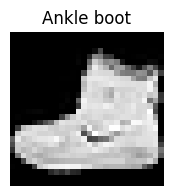


CNN Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)


--- Training the CNN Model ---
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 56s 63ms/step - accuracy: 0.7039 - loss: 0.8290 - val_accuracy: 0.8492 - val_loss: 0.4035
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 79s 60ms/step - accuracy: 0.8689 - loss: 0.3655 - val_accuracy: 0.8787 - val_loss: 0.3369
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 61ms/step - accuracy: 0.8907 - loss: 0.3046 - val_accuracy: 0.8920 - val_loss: 0.2915
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 85s 65ms/step - accuracy: 0.9043 - loss: 0.2646 - val_accuracy: 0.8997 - val_loss: 0.2709
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 62ms/step - accuracy: 0.9074 - loss: 0.2506 - val_accuracy: 0.9005 - val_loss: 0.2692

--- Evaluating the CNN Model ---
313/313 - 3s - 9ms/step - accuracy: 0.8983 - loss: 0.2844

Test Accuracy: 0.8983


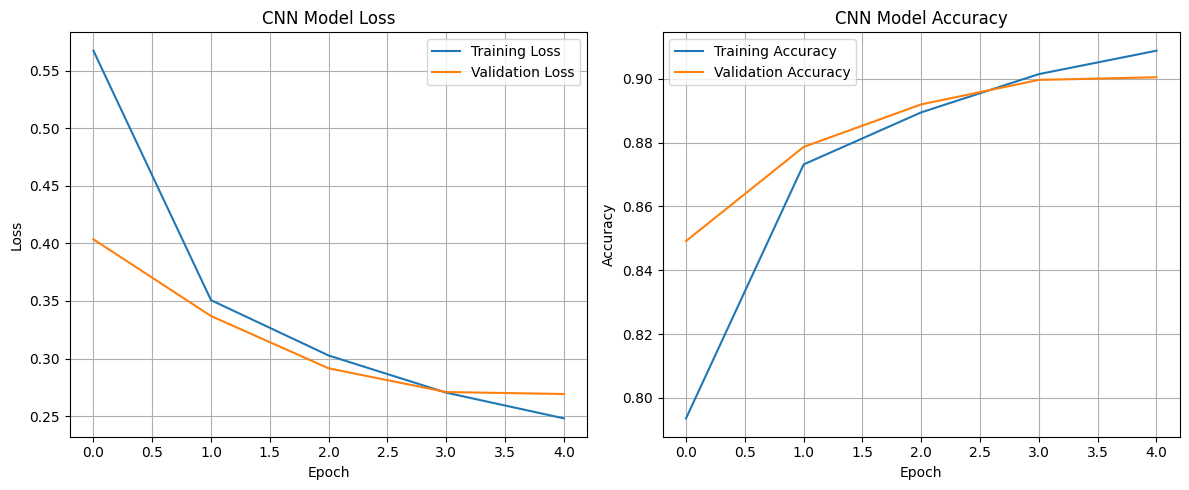


--- Making Predictions ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Raw predictions for first 5 test images:
[[1.73722708e-06 1.40823943e-07 1.80170858e-07 3.50030049e-08
  1.43154310e-07 5.46266790e-04 1.53853662e-07 4.31470049e-04
  2.39492948e-07 9.99019623e-01]
 [7.85724696e-05 4.27773834e-08 9.99718010e-01 9.44548404e-08
  1.80979532e-05 2.36759001e-10 1.80734525e-04 1.24917817e-13
  4.18350555e-06 2.30968467e-07]
 [1.72206960e-09 1.00000000e+00 4.29960245e-08 1.31122704e-08
  1.40647965e-10 7.08133393e-15 3.49847300e-12 3.51899309e-15
  1.56324476e-12 5.31813659e-16]
 [2.55354536e-07 9.99997616e-01 1.18834365e-07 1.95465191e-06
  1.26529059e-07 2.66273570e-12 1.46451526e-08 2.41546626e-12
  6.42463235e-11 3.26306609e-13]
 [1.57250866e-01 8.67574054e-05 7.13147596e-03 1.53901346e-03
  2.87663452e-02 4.56783891e-06 8.05119038e-01 1.05570007e-06
  9.40159807e-05 6.83892358e-06]]

Predicted classes for first 5 test images: [9 2 1 1 6]
Actual labels for first 5 test images: [9 2 1 1 6]

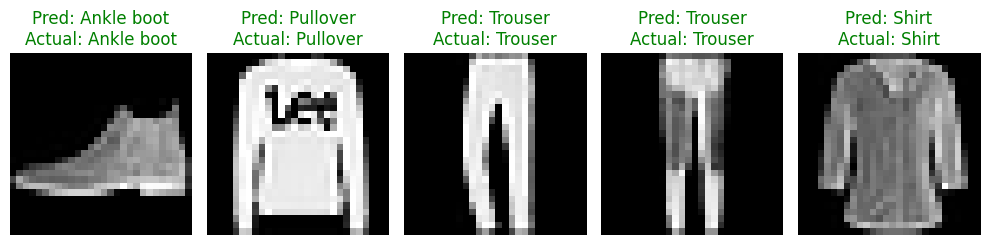

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

print("\n--- 4.3.4 Typical CNN Architecture for Image Classification ---")

# Load a built-in image dataset: Fashion MNIST
# This dataset contains 70,000 grayscale images of fashion items (28x28 pixels each).
# 60,000 for training, 10,000 for testing. 10 classes.
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Preprocess the data:
# 1. Reshape images to include a channel dimension (28, 28, 1 for grayscale)
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# 2. Convert labels to one-hot encoding for categorical_crossentropy
# We will use 'sparse_categorical_crossentropy' which doesn't require one-hot encoding,
# so we'll keep labels as integers for simplicity.
# train_labels = keras.utils.to_categorical(train_labels)
# test_labels = keras.utils.to_categorical(test_labels)

# Define class names for Fashion MNIST for better interpretation
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Number of classes: {len(np.unique(train_labels))}")

# Display a sample image
plt.figure(figsize=(2,2))
plt.imshow(train_images[0].reshape(28,28), cmap='gray')
plt.title(class_names[train_labels[0]])
plt.axis('off')
plt.show()

# 1. Build the CNN Model using Keras Sequential API
cnn_model = models.Sequential([
    # Convolutional Block 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # 32 filters, 3x3 kernel
    layers.MaxPooling2D((2, 2)), # 2x2 pooling window

    # Convolutional Block 2
    layers.Conv2D(64, (3, 3), activation='relu'), # 64 filters, 3x3 kernel
    layers.MaxPooling2D((2, 2)),

    # Convolutional Block 3 (Optional, sometimes just 2 blocks are enough for simple tasks)
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flatten Layer: Prepare for Dense layers
    layers.Flatten(),

    # Fully Connected (Dense) Layers
    layers.Dense(64, activation='relu'), # Hidden Dense layer with 64 neurons

    # Output Layer: 10 neurons for 10 classes, Softmax for probabilities
    layers.Dense(10, activation='softmax')
])

# 2. Display Model Summary
print("\nCNN Model Summary:")
cnn_model.summary()

# 3. Compile the model
# Use sparse_categorical_crossentropy because labels are integers (0-9)
# If labels were one-hot encoded, we'd use 'categorical_crossentropy'
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# 4. Train the model
print("\n--- Training the CNN Model ---")
history = cnn_model.fit(
    train_images, train_labels,
    epochs=5,           # Training for 5 epochs (can increase for better accuracy)
    batch_size=64,
    validation_split=0.1 # Use 10% of training data for validation
)

# 5. Evaluate the model on test data
print("\n--- Evaluating the CNN Model ---")
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Make predictions on a few test images
print("\n--- Making Predictions ---")
predictions = cnn_model.predict(test_images[:5])
predicted_classes = np.argmax(predictions, axis=1) # Get the index of the highest probability

print(f"Raw predictions for first 5 test images:\n{predictions}")
print(f"\nPredicted classes for first 5 test images: {predicted_classes}")
print(f"Actual labels for first 5 test images: {test_labels[:5]}")

print("\nVisualizing some predictions:")
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nActual: {class_names[test_labels[i]]}",
              color='green' if predicted_classes[i] == test_labels[i] else 'red')
    plt.axis('off')
plt.tight_layout()
plt.show()


--- 4.3.4 Typical CNN Architecture for Image Classification ---
Train images shape: (60000, 28, 28, 1)
Test images shape:  (10000, 28, 28, 1)
Number of classes:  10


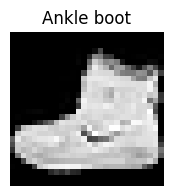


CNN Model Summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 459,722 (1.75 MB)

 Trainable params: 459,146 (1.75 MB)

 Non-trainable params: 576 (2.25 KB)


--- Training the CNN Model ---
Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 123s 141ms/step - accuracy: 0.8145 - loss: 0.5451 - val_accuracy: 0.9040 - val_loss: 0.2672 - learning_rate: 0.0010
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 143s 142ms/step - accuracy: 0.8974 - loss: 0.2837 - val_accuracy: 0.9087 - val_loss: 0.2457 - learning_rate: 0.0010
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 118s 140ms/step - accuracy: 0.9137 - loss: 0.2397 - val_accuracy: 0.9132 - val_loss: 0.2341 - learning_rate: 0.0010
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 141s 139ms/step - accuracy: 0.9228 - loss: 0.2130 - val_accuracy: 0.9080 - val_loss: 0.2482 - learning_rate: 0.0010
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 140s 137ms/step - accuracy: 0.9290 - loss: 0.1938 - val_accuracy: 0.9225 - val_loss: 0.2157 - learning_rate: 0.0010
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 121s 143ms/step - accuracy: 0.9346 - loss: 0.1758 - val_accuracy: 0.9245 - val_loss: 0.2042 - learning_rate: 0.0010
Epoch 7/10
844/844 ━━━━━━━━━━━━━

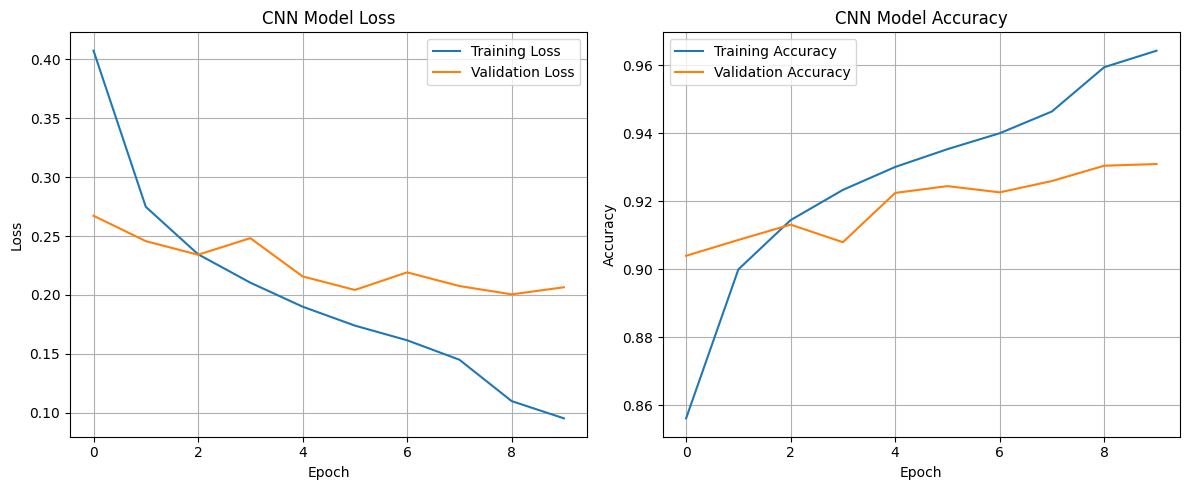


--- Making Predictions ---
Predicted classes (first 5): [9, 2, 1, 1, 6]
Actual labels    (first 5): [9, 2, 1, 1, 6]


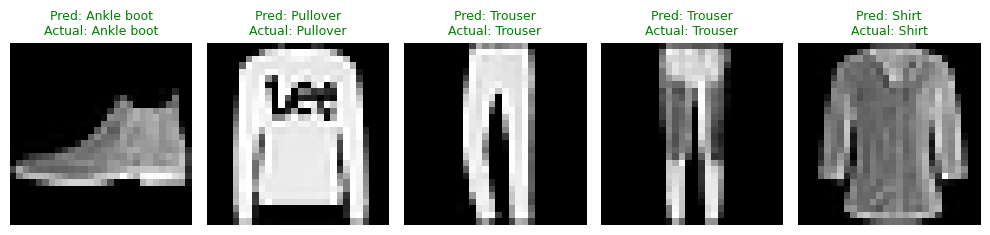

In [27]:
# --- 4.3.4 Typical CNN Architecture for Image Classification (Fashion-MNIST) ---

import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

# ------------------ Reproducibility ------------------
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

print("\n--- 4.3.4 Typical CNN Architecture for Image Classification ---")

# ------------------ Load Dataset ------------------
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Class names for better interpretation
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# ------------------ Preprocess ------------------
# Reshape to (H, W, C) and scale to [0, 1]
train_images = train_images.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
test_images  = test_images.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

print(f"Train images shape: {train_images.shape}")
print(f"Test images shape:  {test_images.shape}")
print(f"Number of classes:  {len(np.unique(train_labels))}")

# Optional: show a sample image
plt.figure(figsize=(2, 2))
plt.imshow(train_images[0].reshape(28, 28), cmap='gray')
plt.title(class_names[int(train_labels[0])])
plt.axis('off')
plt.show()

# ------------------ Build Model ------------------
# Normalization layer (fixed stats; alternatively adapt on train_images)
normalizer = layers.Normalization(mean=0.1307, variance=0.3081**2)
# If you prefer data-driven stats, uncomment the next line:
# normalizer.adapt(train_images)

cnn_model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    normalizer,

    # Block 1
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Block 2
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Block 3
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(10, activation='softmax')
])

print("\nCNN Model Summary:")
cnn_model.summary()

# ------------------ Compile ------------------
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # integer labels 0..9
    metrics=['accuracy']
)

# ------------------ Callbacks ------------------
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy', patience=3, restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='best_fashion_mnist_cnn.keras', monitor='val_accuracy',
        save_best_only=True
    )
]

# ------------------ Train ------------------
print("\n--- Training the CNN Model ---")
history = cnn_model.fit(
    train_images, train_labels,
    epochs=10,             # increase if you want higher accuracy
    batch_size=64,
    validation_split=0.1,  # hold out 10% of training for validation
    callbacks=callbacks,
    verbose=1
)

# ------------------ Evaluate ------------------
print("\n--- Evaluating the CNN Model ---")
test_loss, test_acc = cnn_model.evaluate(test_images, test_labels, verbose=0)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# ------------------ Plot History ------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history.get('loss', []), label='Training Loss')
plt.plot(history.history.get('val_loss', []), label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history.get('accuracy', []), label='Training Accuracy')
plt.plot(history.history.get('val_accuracy', []), label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# ------------------ Predictions & Visualization ------------------
print("\n--- Making Predictions ---")
probs = cnn_model.predict(test_images[:5], verbose=0)  # shape (5, 10)
predicted_classes = np.argmax(probs, axis=1)

print("Predicted classes (first 5):", predicted_classes.tolist())
print("Actual labels    (first 5):", test_labels[:5].tolist())

# Visualize first 5 predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_name = class_names[int(predicted_classes[i])]
    true_name = class_names[int(test_labels[i])]
    title_color = 'green' if predicted_classes[i] == test_labels[i] else 'red'
    plt.title(f"Pred: {pred_name}\nActual: {true_name}", color=title_color, fontsize=9)
    plt.axis('off')
plt.tight_layout()
plt.show()

# ------------------ Optional: Confusion Matrix & Report ------------------
# Requires scikit-learn; uncomment if available.
# from sklearn.metrics import classification_report, confusion_matrix
# y_pred = np.argmax(cnn_model.predict(test_images, verbose=0), axis=1)
# print("\nClassification Report:\n", classification_report(test_labels, y_pred, target_names=class_names))
# cm = confusion_matrix(test_labels, y_pred)
# print("Confusion Matrix:\n", cm)


* **Exercise:**

    1.  In the `cnn_model.summary()` output, observe the `Output Shape` after each `Conv2D` and `MaxPooling2D` layer. How do these layers change the spatial dimensions (width and height) of the data?
    2.  Try adding another `Conv2D` layer (e.g., with 128 filters and `(3,3)` kernel) before the `Flatten` layer. Retrain the model for a few epochs. Does the accuracy change significantly? What does adding more layers generally allow a CNN to learn?


## **4.4: RNN and LSTM for Sequence Prediction**

### **4.4.1 Introduction to Sequence Data and RNNs**

  * **Concept: The Importance of Order**
    Think about these examples:

      * **"I am happy" vs. "Am I happy?"**: Same words, different order, different meaning.
      * **Stock prices**: The price tomorrow depends heavily on today's price, and yesterday's, and so on.
      * **Speech recognition**: Understanding a word requires hearing the sounds in sequence.

    Traditional ANNs and CNNs treat each input independently. If you give them a sequence of words, they'd process each word as if it were unrelated to the words before or after it. This is a major limitation for tasks where the *order* and *context* of data points are crucial.

  * **Recurrent Neural Networks (RNNs): The "Memory" Approach**
    RNNs are designed to process sequential data. Their key innovation is a **loop** in their architecture, which allows information to persist from one step of the sequence to the next.

      * **Internal State (Hidden State/Memory):** Imagine an RNN neuron having a small "memory" cell. When it processes an input at a given time step (e.g., a word in a sentence), it considers not just the current input, but also its memory from the previous time step. It then updates its memory and produces an output.
      * **Unrolling the RNN:** Although RNNs have a loop, conceptually we "unroll" them over time. This means for a sequence of length T, you can imagine T copies of the RNN cell, where the output of one cell feeds into the next.
      * **Shared Weights:** Critically, the *same* weights are used at *every* time step of the unrolled RNN. This is very important for learning patterns that occur anywhere in the sequence, and it also keeps the number of parameters manageable.

  * **Mathematical Concept (Simplified):**
    For a given time step $t$:

      * \begin{align}$h\_t = \\text{Activation}(W\_{hh}h\_{t-1} + W\_{xh}x\_t + b\_h)$\end{align}
      * $y\_t = W\_{hy}h\_t + b\_y$

    Where:

      * $x\_t$: Input at time $t$
      * $h\_t$: Hidden state (memory) at time $t$
      * $h\_{t-1}$: Hidden state from the previous time step
      * $W\_{hh}, W\_{xh}, W\_{hy}$: Weight matrices (shared across all time steps)
      * $b\_h, b\_y$: Bias vectors (shared across all time steps)
      * $\\text{Activation}$: A non-linear activation function (e.g., `tanh` or `ReLU`)

  * **Limitations of Basic RNNs:**
    While revolutionary, basic RNNs suffer from practical issues, primarily:

      * **Vanishing Gradients:** During backpropagation (the process of updating weights), gradients (signals that guide weight updates) can become extremely small as they propagate back through many time steps. This makes it difficult for the network to learn long-term dependencies (relationships between data points far apart in the sequence).
      * **Exploding Gradients:** Conversely, gradients can also become extremely large, leading to unstable training and large weight updates that prevent the model from converging. (Less common than vanishing, but still an issue).

  * **Colab Explanation (Conceptual RNN Flow):**

In [28]:
import numpy as np
import matplotlib.pyplot as plt

print("--- 4.4.1 Introduction to Sequence Data and RNNs ---")

print("\nImagine a simple RNN processing a sequence of numbers like [10, 20, 30]:")
print("At each step, it takes the current input AND its 'memory' from the previous step.")

# A very simple, conceptual RNN cell function (not a real Keras layer)
def simple_rnn_cell(current_input, previous_hidden_state, W_xh, W_hh, b_h, activation_fn):
    """
    Simulates a single step of a simple RNN cell.
    """
    # Calculate the new hidden state based on current input and previous hidden state
    new_hidden_state = activation_fn(
        np.dot(current_input, W_xh) +
        np.dot(previous_hidden_state, W_hh) +
        b_h
    )
    return new_hidden_state

# Let's define some dummy weights and biases (these would be learned in a real RNN)
input_dim = 1    # Our inputs are single numbers
hidden_dim = 2   # Our memory (hidden state) will be a vector of 2 numbers

W_xh = np.array([[0.5, 0.2]]) # Weights from input to hidden state
W_hh = np.array([[0.8, -0.1],
                 [0.3, 0.7]]) # Weights for recurrent connection (hidden to hidden)
b_h = np.array([-0.1, 0.2])  # Bias for hidden state

# Using tanh as a common RNN activation function
def tanh_activation(z):
    return np.tanh(z)

sequence = [10, 20, 30]
hidden_state = np.zeros(hidden_dim) # Initialize hidden state to zeros

print(f"\nInitial hidden state (memory): {hidden_state}")
print(f"Sequence to process: {sequence}")

for i, x_t in enumerate(sequence):
    print(f"\n--- Processing Step {i+1}, Input: {x_t} ---")
    hidden_state = simple_rnn_cell(np.array([x_t]), hidden_state, W_xh, W_hh, b_h, tanh_activation)
    print(f"  Updated hidden state (memory): {hidden_state}")

print("\nNotice how the hidden state changes at each step, carrying information forward.")
print("This 'memory' is what allows RNNs to understand context in sequences.")

--- 4.4.1 Introduction to Sequence Data and RNNs ---

Imagine a simple RNN processing a sequence of numbers like [10, 20, 30]:
At each step, it takes the current input AND its 'memory' from the previous step.

Initial hidden state (memory): [0. 0.]
Sequence to process: [10, 20, 30]

--- Processing Step 1, Input: 10 ---
  Updated hidden state (memory): [0.9998891  0.97574313]

--- Processing Step 2, Input: 20 ---
  Updated hidden state (memory): [1.         0.99985988]

--- Processing Step 3, Input: 30 ---
  Updated hidden state (memory): [1.         0.99999752]

Notice how the hidden state changes at each step, carrying information forward.
This 'memory' is what allows RNNs to understand context in sequences.


* **Exercise:**

    1.  In your own words, explain why a traditional feedforward ANN would struggle with predicting the next word in a sentence like "The cat sat on the \_\_\_\_\_."
    2.  What is the core idea that allows RNNs to handle sequence data, which is missing in feedforward ANNs?

-----

### **4.4.2 Long Short-Term Memory (LSTM) Networks**

  * **Concept: Solving the Memory Problem**
    LSTMs are a special type of RNN designed to overcome the vanishing gradient problem, allowing them to learn **long-term dependencies**. They do this through a sophisticated internal mechanism called a "cell state" and a series of "gates" that regulate the flow of information.

      * **Cell State ($C\_t$):** This is the core of the LSTM. It acts like a "conveyor belt" that runs straight through the entire chain of time steps, carrying information along. Information can be added to or removed from the cell state, but it generally flows unchanged, allowing information to persist over very long sequences.
      * **Gates:** LSTMs have three main gates, which are essentially neural network layers (usually Sigmoid activation, outputting values between 0 and 1) that learn what information to let through.
        1.  **Forget Gate ($f\_t$):** Decides what information from the previous cell state ($C\_{t-1}$) should be *thrown away*. A value of 0 means "forget completely," 1 means "keep completely."
              * $f\_t = \\sigma(W\_f \\cdot [h\_{t-1}, x\_t] + b\_f)$
        2.  **Input Gate ($i\_t$):** Decides what new information from the current input ($x\_t$) should be *stored* in the cell state. It works in two parts:
              * The input gate layer $i\_t$ decides which values to update.
              * A `tanh` layer $\\tilde{C}\_t$ creates a vector of new candidate values.
              * $i\_t = \\sigma(W\_i \\cdot [h\_{t-1}, x\_t] + b\_i)$
              * $\\tilde{C}*t = \\tanh(W\_C \\cdot [h*{t-1}, x\_t] + b\_C)$
        3.  **Output Gate ($o\_t$):** Decides what part of the cell state should be output as the new hidden state ($h\_t$). This hidden state is what will be passed to the next LSTM unit and also used to make predictions.
              * $o\_t = \\sigma(W\_o \\cdot [h\_{t-1}, x\_t] + b\_o)$
              * $h\_t = o\_t \\cdot \\tanh(C\_t)$
      * **Updating the Cell State:**
          *\begin{align} C\_t = f\_t \\cdot C\_{t-1} + i\_t \\cdot \\tilde{C}\_t\end{align} (This is where information is forgotten and new info is added)

  * **Why LSTMs Work:** The gates allow LSTMs to selectively remember or forget information, preventing gradients from vanishing too quickly. This makes them extremely effective for tasks requiring the model to remember context over long periods.

  * **Other Gated RNNs (Brief Mention):** GRUs (Gated Recurrent Units) are a simpler variant of LSTMs, with fewer gates, and often perform similarly well on many tasks while being slightly faster.

  * **Colab Example (Conceptual Illustration of LSTM Gates):**

In [29]:
import numpy as np

print("\n--- 4.4.2 Long Short-Term Memory (LSTM) Networks ---")

print("LSTMs use 'gates' to control the flow of information, helping them remember long-term patterns.")

# Simulate the values from a single LSTM step's gates (conceptual)
# These values would come from sigmoid activations, so they are between 0 and 1.
forget_gate_output = 0.2 # Let's say the forget gate decides to forget 80% of old memory
input_gate_output = 0.8  # And the input gate decides to allow 80% of new info
candidate_new_info = 0.7 # New information proposed by the tanh layer
output_gate_output = 0.9 # How much of the cell state should be exposed

previous_cell_state = 0.5 # The memory from the previous time step

print(f"\nPrevious Cell State (old memory): {previous_cell_state:.2f}")
print(f"Forget Gate Output (0=forget, 1=keep): {forget_gate_output:.2f}")
print(f"Input Gate Output (0=block new, 1=allow new): {input_gate_output:.2f}")
print(f"Candidate New Info (proposed by tanh): {candidate_new_info:.2f}")
print(f"Output Gate Output (0=hide memory, 1=expose memory): {output_gate_output:.2f}")


# Step 1: Forget old information and add new information to create the current cell state
current_cell_state = (forget_gate_output * previous_cell_state) + (input_gate_output * candidate_new_info)
print(f"\nCalculated Current Cell State (updated memory): {current_cell_state:.2f}")

# Step 2: Decide what part of the cell state to output as the hidden state
# (tanh(current_cell_state) squashes the cell state to a range of -1 to 1)
new_hidden_state = output_gate_output * np.tanh(current_cell_state)
print(f"Calculated New Hidden State (output passed to next step): {new_hidden_state:.2f}")

print("\nThis selective remembering and forgetting is what makes LSTMs so powerful for long sequences.")


--- 4.4.2 Long Short-Term Memory (LSTM) Networks ---
LSTMs use 'gates' to control the flow of information, helping them remember long-term patterns.

Previous Cell State (old memory): 0.50
Forget Gate Output (0=forget, 1=keep): 0.20
Input Gate Output (0=block new, 1=allow new): 0.80
Candidate New Info (proposed by tanh): 0.70
Output Gate Output (0=hide memory, 1=expose memory): 0.90

Calculated Current Cell State (updated memory): 0.66
Calculated New Hidden State (output passed to next step): 0.52

This selective remembering and forgetting is what makes LSTMs so powerful for long sequences.


* **Exercise:**

    1.  What is the main problem that LSTMs were designed to solve that basic RNNs struggle with?
    2.  Briefly describe the role of the "forget gate" in an LSTM unit. What would happen if its output was always close to 0?

-----

### **4.4.3 Preparing Sequential Data for RNN/LSTM**

  * **Concept:**
    Data for RNNs/LSTMs needs to be specifically formatted. It's not just a collection of independent samples; each sample is a *sequence* of data points.

      * **3D Input Shape:** Keras RNN/LSTM layers expect input data to have a specific 3D shape: `(batch_size, timesteps, features)`.

          * `batch_size`: The number of sequences processed at a time during training (e.g., 32 sentences).
          * `timesteps`: The length of each sequence (e.g., number of words in a sentence, number of days in a stock price history).
          * `features`: The number of features for each item at each time step (e.g., if each word is represented by a 100-dimensional embedding, features=100; if a stock price has Open, High, Low, Close, features=4).

      * **Padding Sequences:** If your sequences have different lengths (e.g., sentences of varying word counts), you typically need to "pad" the shorter sequences with zeros to make them all the same length. This is necessary for creating uniform batches. `tf.keras.preprocessing.sequence.pad_sequences` is a common tool for this.

      * **Example Scenarios:**

          * **Time Series:** Predicting next day's stock price based on the last 10 days.
              * `timesteps = 10`, `features = number of stock attributes (e.g., 4: Open, High, Low, Close)`
              * Input `X`: `(batch_size, 10, 4)`
              * Output `y`: `(batch_size, 1)` (next day's closing price)
          * **Text (Word-level):** Predicting the next word based on the previous 5 words.
              * `timesteps = 5`, `features = embedding_dimension (e.g., 100)`
              * Input `X`: `(batch_size, 5, 100)`
              * Output `y`: `(batch_size, vocab_size)` (probability distribution over vocabulary)

  * **Colab Example (Time Series Data Preparation):**
    We'll create a simple synthetic time series (e.g., daily temperature) and prepare it for an LSTM.


--- 4.4.3 Preparing Sequential Data for RNN/LSTM ---


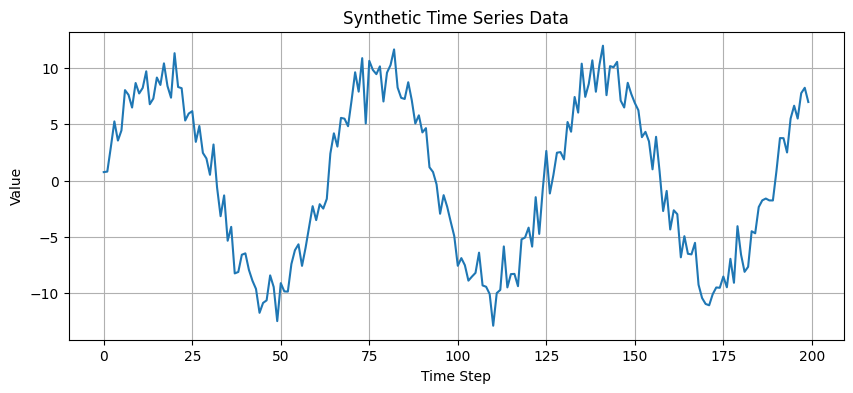

Original data shape: (200,)
Scaled data shape: (200, 1)

Number of sequences created: 190
Example X (first sequence of 10 steps):
[0.54861482 0.5504619  0.63774041 0.72961915 0.66128786 0.69753551
 0.84139074 0.82439987 0.77913627 0.86683648]
Example y (next value for first sequence):
[0.82948424]

Reshaped X for LSTM input: (190, 10, 1) (samples, timesteps, features)
y shape: (190, 1)

Training set X shape: (152, 10, 1)
Training set y shape: (152, 1)
Test set X shape: (38, 10, 1)
Test set y shape: (38, 1)

Sequential data successfully prepared for RNN/LSTM modeling!


In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

print("\n--- 4.4.3 Preparing Sequential Data for RNN/LSTM ---")

# 1. Generate a synthetic time series dataset (e.g., a sine wave with noise)
def generate_time_series(num_points):
    time = np.arange(num_points)
    amplitude = np.sin(time / 10.0) * 10 # Sine wave
    noise = np.random.normal(0, 1.5, num_points) # Some random noise
    return amplitude + noise

data = generate_time_series(200) # 200 data points
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Synthetic Time Series Data')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# 2. Normalize the data (important for RNNs/LSTMs)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1)) # Reshape for scaler (needs 2D array)

# 3. Create sequences for training (Input: previous 'n' steps, Output: next step)
n_steps = 10 # Use the past 10 time steps to predict the next one

X, y = [], []
for i in range(len(data_scaled) - n_steps):
    X.append(data_scaled[i : i + n_steps]) # Input sequence of 'n_steps'
    y.append(data_scaled[i + n_steps])     # Output is the next value after the sequence

X = np.array(X)
y = np.array(y)

print(f"Original data shape: {data.shape}")
print(f"Scaled data shape: {data_scaled.shape}")
print(f"\nNumber of sequences created: {len(X)}")
print(f"Example X (first sequence of {n_steps} steps):\n{X[0].flatten()}")
print(f"Example y (next value for first sequence):\n{y[0].flatten()}")

# 4. Reshape X to (samples, timesteps, features)
# Our data currently has 1 feature per timestep, so the last dimension is 1.
X = X.reshape(X.shape[0], X.shape[1], 1)
print(f"\nReshaped X for LSTM input: {X.shape} (samples, timesteps, features)")
print(f"y shape: {y.shape}")

# 5. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set X shape: {X_train.shape}")
print(f"Training set y shape: {y_train.shape}")
print(f"Test set X shape: {X_test.shape}")
print(f"Test set y shape: {y_test.shape}")

print("\nSequential data successfully prepared for RNN/LSTM modeling!")

* **Exercise:**

    1.  If you have text data where each word is represented by a 50-dimensional word embedding, and you want to predict the next word based on the previous 8 words, what would be the `(batch_size, timesteps, features)` shape of your input data `X` for an LSTM layer?
    2.  Why is normalizing (scaling) time series data particularly important for training RNNs/LSTMs?

-----

### **4.4.4 Building and Training RNN/LSTM Models with Keras**

  * **Concept:**
    Keras makes building RNNs very similar to building ANNs or CNNs, using the `Sequential` API. The key difference is using specific recurrent layers like `SimpleRNN` or, more commonly, `LSTM`.

      * **`layers.LSTM()`:**
          * `units`: The number of internal memory units (LSTM cells) in the layer. This also determines the dimensionality of the hidden state output.
          * `input_shape`: For the first LSTM layer, you need to specify `(timesteps, features)`. Keras handles the `batch_size` automatically.
          * `return_sequences=True`: If you want the LSTM layer to output a sequence of its hidden states for *each* time step (useful if you stack multiple recurrent layers). Default is `False`, meaning it only outputs the hidden state of the *last* time step.
      * **`layers.SimpleRNN()`:** A basic RNN layer, useful for understanding the concept but often less performant than LSTMs for complex long-term dependencies.
      * **Output Layer:** For time series forecasting, the output layer will typically be a `Dense` layer with `units=1` and a linear (or no explicit) activation, as you are predicting a continuous value.

  * **Colab Example (LSTM for Time Series Prediction):**


--- 4.4.4 Building and Training RNN/LSTM Models with Keras ---
Number of features per timestep: 1
Timesteps per sequence: 10

LSTM Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)


--- Training the LSTM Model ---
Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - loss: 0.2860 - mae: 0.4679 - val_loss: 0.1964 - val_mae: 0.3823
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.1961 - mae: 0.3789 - val_loss: 0.1187 - val_mae: 0.2858
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1181 - mae: 0.2848 - val_loss: 0.0538 - val_mae: 0.1858
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0554 - mae: 0.1947 - val_loss: 0.0172 - val_mae: 0.1141
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0253 - mae: 0.1365 - val_loss: 0.0257 - val_mae: 0.1309
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0325 - mae: 0.1526 - val_loss: 0.0237 - val_mae: 0.1271
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0272 - mae: 0.1410 - val_loss: 0.0150 - val_mae: 0.1117
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0219 - mae: 0.1277 - val_loss: 0.0153 - val_mae: 0.1072
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/st

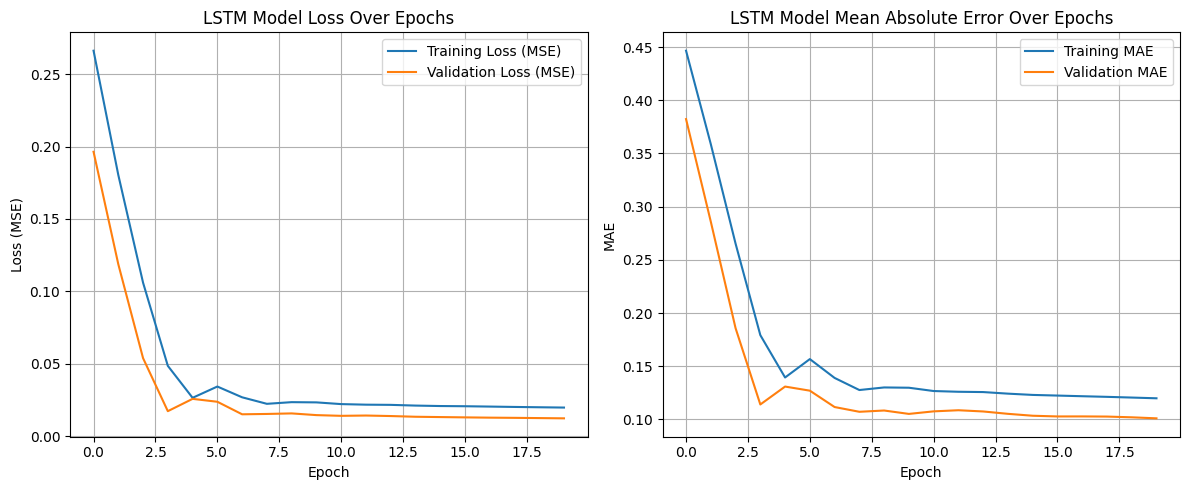


--- Evaluating the LSTM Model ---
Test Loss (MSE): 0.0139
Test Mean Absolute Error (MAE): 0.1052

--- Making Predictions with the LSTM Model ---


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


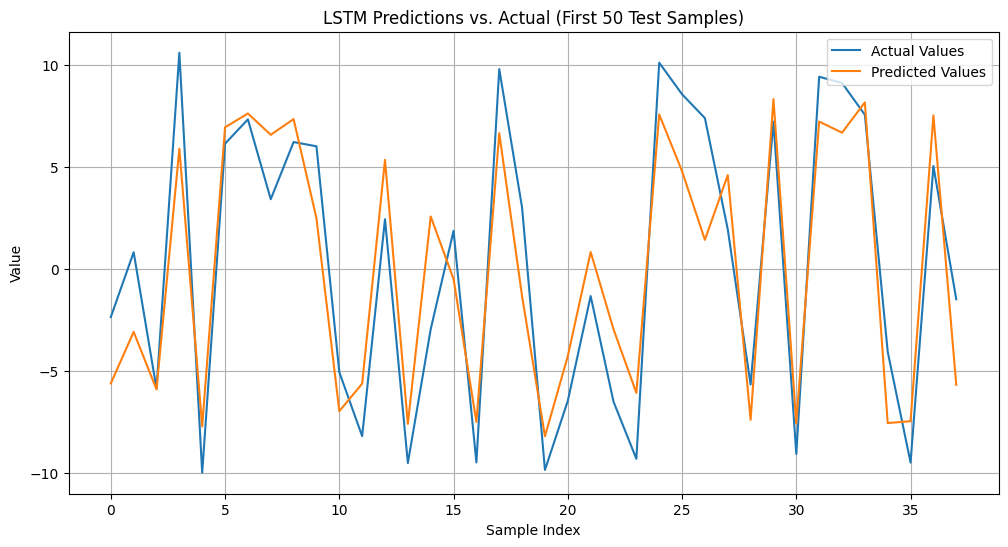


First 5 Actual vs. Predicted values (original scale):
  Actual: -2.35, Predicted: -5.61
  Actual: 0.83, Predicted: -3.08
  Actual: -5.86, Predicted: -5.90
  Actual: 10.61, Predicted: 5.91
  Actual: -9.99, Predicted: -7.72


In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

print("\n--- 4.4.4 Building and Training RNN/LSTM Models with Keras ---")

# Reuse data prepared in the previous section
# X_train, X_test, y_train, y_test, scaler, n_steps

# Get the number of features for our LSTM input (last dimension of X_train)
num_features = X_train.shape[2]
print(f"Number of features per timestep: {num_features}")
print(f"Timesteps per sequence: {n_steps}")

# 1. Build the LSTM Model
lstm_model = models.Sequential([
    # LSTM Layer:
    # units=50: The number of LSTM cells (memory units) in this layer.
    # input_shape=(n_steps, num_features): Defines the expected shape of each sequence (timesteps, features).
    layers.LSTM(units=50, activation='relu', input_shape=(n_steps, num_features)), # 'relu' is sometimes used for LSTMs too

    # Output Layer:
    # units=1: We are predicting a single numerical value (next step in time series).
    # activation='linear': For regression tasks, no specific activation is usually needed, or 'linear' is explicit.
    layers.Dense(units=1, activation='linear')
])

# 2. Display Model Summary
print("\nLSTM Model Summary:")
lstm_model.summary()

# 3. Compile the model
# Optimizer: 'adam' is a good general choice.
# Loss: 'mse' (Mean Squared Error) is standard for regression problems.
# Metrics: We'll monitor 'mae' (Mean Absolute Error) for easier interpretation.
lstm_model.compile(optimizer='adam',
                   loss='mse',
                   metrics=['mae'])

# 4. Train the model
print("\n--- Training the LSTM Model ---")
history_lstm = lstm_model.fit(
    X_train, y_train,
    epochs=20,           # Number of epochs (can be increased for more complex data)
    batch_size=32,
    validation_split=0.1, # Use 10% of training data for validation
    verbose=1
)

print("\nLSTM Model training complete!")

# Plotting training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Training Loss (MSE)')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss (MSE)')
plt.title('LSTM Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mae'], label='Training MAE')
plt.plot(history_lstm.history['val_mae'], label='Validation MAE')
plt.title('LSTM Model Mean Absolute Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Evaluate the model on test data
print("\n--- Evaluating the LSTM Model ---")
test_loss_lstm, test_mae_lstm = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss_lstm:.4f}")
print(f"Test Mean Absolute Error (MAE): {test_mae_lstm:.4f}")

# 6. Make Predictions
print("\n--- Making Predictions with the LSTM Model ---")
predictions_scaled = lstm_model.predict(X_test)

# Inverse transform predictions and actual values to original scale for interpretation
predictions = scaler.inverse_transform(predictions_scaled)
actual_values = scaler.inverse_transform(y_test)

# Plot actual vs. predicted values for a segment of the test set
plt.figure(figsize=(12, 6))
plt.plot(actual_values[:50], label='Actual Values')
plt.plot(predictions[:50], label='Predicted Values')
plt.title('LSTM Predictions vs. Actual (First 50 Test Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

print("\nFirst 5 Actual vs. Predicted values (original scale):")
for i in range(5):
    print(f"  Actual: {actual_values[i][0]:.2f}, Predicted: {predictions[i][0]:.2f}")

* **Exercise:**

    1.  Change `layers.LSTM` to `layers.SimpleRNN` in the `lstm_model` definition. Retrain the model with the same parameters. How does the "Test MAE" compare between the LSTM and SimpleRNN on this time series task? (You might need more epochs for SimpleRNN to see a clear difference).
    2.  What is the purpose of `return_sequences=True` when stacking multiple LSTM layers, and why did we *not* use it for the last LSTM layer in our example (which is followed by a `Dense` layer)?
